<a href="https://colab.research.google.com/github/MariiaKalinina/R/blob/main/Main_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import torch
from math import *
from scipy.stats import pearsonr
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
from numba import njit
import numpy as np
from scipy.integrate import dblquad

import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import matplotlib.colors

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Your imports
from mlxtend.plotting import plot_decision_regions

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit

import time
import math
from sklearn.metrics import roc_curve, average_precision_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Import data

## From GitHubRepo

In [ ]:
!pip install GitPython
from git import Repo
!git clone https://github.com/MariiaKalinina/R.git Ros

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
Cloning into 'Ros'...
remote: Enumerating objects: 204, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 204 (delta 76), reused 42 (delta 42), pack-reused 100 (from 1)
Receiving objects: 100% (204/204), 56.93 MiB | 16.39 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [ ]:
path_to_ser = Path('/content/Ros/Data/Rosatom_dataset.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Ros/Data/Rosatom_dataset.xlsx'

## From Google Drive

In [4]:
!pip install gdown pandas openpyxl

In [5]:
from google.colab import drive
drive.mount('/content/drive')  # Mounting at the default mount point

Mounted at /content/drive


In [6]:
output_file = '/content/drive/My Drive/Rosatom/Rosatom_dataset.xlsx'
path_to_ser = Path(output_file)

target = 'TC'

if target == str('TC'):
  data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging_TC', skiprows=0)
else:
  data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging_VHC', skiprows=0)

data = data_initial.copy()

## From sctretch

In [ ]:
path_to_ser = Path('/content/Rosatom_dataset.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
data = data_initial.copy()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Rosatom_dataset.xlsx'

# Data Processing

In [7]:
data[:10]

,Sample ID,Top Depth,Target,Offset,Depth_TC,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Глубина_ГК,...,Глубина_Rez,Rez,Глубина_КВ,КВ (c вычета долота),N/A,КВ (без вычета долота)?,Глубина_КС,КС,Глубина_Термометрия,Темометрия
0,#,m,W/(m·K),m,m,NaN,NaN,через 5,NaN,м,...,м,NaN,м,NaN,NaN,NaN,м,Ом*м,м,Градуссы Цельсия
1,625,30.52,2.555,0,30.525,NaN,NaN,NaN,NaN,0.1,...,12.7,35.31,0.04,6.0,-108.0,120.0,12.7,480.68,0.04,18.8
2,625,30.52,2.556,0.001,30.526,0.001,0.001,NaN,NaN,0.2,...,12.8,28.72,0.14,6.4,-107.6,120.4,12.8,474.61,0.14,18.8
3,625,30.52,2.52,0.002,30.527,NaN,0.001,NaN,NaN,0.3,...,12.9,28.73,0.24,6.4,-107.6,120.4,12.9,416.4,0.24,18.8
4,625,30.52,2.541,0.003,30.528,NaN,0.001,NaN,NaN,0.4,...,13,28.70,0.34,6.4,-107.6,120.4,13,452.74,0.34,18.72
5,625,30.52,2.566,0.004,30.529,NaN,0.001,NaN,NaN,0.5,...,13.1,28.68,0.44,5.6,-108.4,119.6,13.1,451.98,0.44,18.72
6,625,30.52,2.527,0.005,30.53,NaN,0.001,NaN,NaN,0.6,...,13.2,28.64,0.54,5.6,-108.4,119.6,13.2,441.43,0.54,18.68
7,625,30.52,2.557,0.006,30.531,NaN,0.001,NaN,NaN,0.7,...,13.3,28.71,0.64,5.2,-108.8,119.2,13.3,511.12,0.64,18.6
8,625,30.52,2.496,0.007,30.532,NaN,0.001,NaN,NaN,0.8,...,13.4,28.60,0.74,5.6,-108.4,119.6,13.4,443.1,0.74,18.56
9,625,30.52,2.495,0.008,30.533,NaN,0.001,NaN,NaN,0.9,...,13.5,28.59,0.84,6.0,-108.0,120.0,13.5,389.29,0.84,18.48


In [8]:
data.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)

In [9]:
data.rename(columns={'Глубина': 'Глубина_КС'}, inplace=True)

data.rename(columns={'ГК': 'ГК '}, inplace=True)
data.rename(columns={'Глубина_ГК': 'Глубина_ГК '}, inplace=True)

data.rename(columns={'ГГК-п ': 'ГГпК'}, inplace=True)
data.rename(columns={'Глубина_ГГК-п': 'Глубина_ГГпК'}, inplace=True)

In [10]:
# Разделение исходных данных на две таблицы - ГИС и НТПК
well_logs = data[['Глубина_ГК ',
       'ГК ', 'Глубина_ГГпК', 'ГГпК', 'Глубина_ПС', 'ПС',
       'Глубина_КС', 'КС']]
well_logs = well_logs.drop(0)
well_logs['Глубина_ПС'] = well_logs['Глубина_ПС'] - 0.04
well_logs['ПС'] = well_logs['ПС']/100
well_logs['ГГпК'] = well_logs['ГГпК']/1000

thermal_logs = data[['Sample ID', 'Top Depth', 'Target', 'Offset', 'Depth_TC']]

In [11]:
# объединение данных ГИС с единой привязкой по глубине
def filter_numeric_range(df, column_name, lower_bound, upper_bound, step):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    filtered_df = filtered_df.dropna()
    filtered_df['Глубина'] = filtered_df[column_name]
    return filtered_df.reset_index(drop=True)


# Filter and convert columns using the function
lower_bound, upper_bound, step = 12.7, 164.1, 0.1
filtered_df_1 = filter_numeric_range(well_logs[['Глубина_ГК ', 'ГК ']], 'Глубина_ГК ', lower_bound, upper_bound, step)
filtered_df_2 = filter_numeric_range(well_logs[['Глубина_ГГпК', 'ГГпК']], 'Глубина_ГГпК', lower_bound, upper_bound, step)
filtered_df_3 = filter_numeric_range(well_logs[['Глубина_ПС', 'ПС']], 'Глубина_ПС', lower_bound, upper_bound, step)
filtered_df_4 = filter_numeric_range(well_logs[['Глубина_КС', 'КС']], 'Глубина_КС', lower_bound, upper_bound, step)



# result = pd.merge(filtered_df_1, filtered_df_4 , on="Глубина", how='inner')
result = pd.merge(filtered_df_1, filtered_df_2, on="Глубина", how='inner')  # Merge filtered_df_1 and filtered_df_4

result = pd.merge(result, filtered_df_3, on="Глубина", how='inner')  # Merge filtered_df_2 with the existing result DataFrame

result = pd.merge(result, filtered_df_4, on="Глубина", how='inner')  # Merge filtered_df_3 with the existing result DataFrame
# # new_df.reset_index(drop=True, inplace=True)

columns_to_drop = [col_name for col_name in well_logs.columns if 'Глубина_' in col_name]
result.drop(columns=columns_to_drop, inplace=True)


well_logs_merged = result[['Глубина', 'ГК ', 'ГГпК', 'ПС', 'КС']]
# объединение данных ГИС с единой привязкой по глубине
well_logs_merged

,Глубина,ГК,ГГпК,ПС,КС
0,12.8,17.27,37.18,3.6066,474.61
1,12.9,16.55,37.31333,3.6258,416.4
2,13.0,17.76,36.765,3.7374,452.74
3,13.3,20.77,37.88667,3.7362,511.12
4,13.4,21.58,37.17333,3.8441,443.1
...,...,...,...,...,...
1072,163.6,22.32,32.135,4.4133,2747.14
1073,163.8,22.5,33.155,4.0983,2904.53
1074,163.9,21.41,33.695,3.9994,2989.96
1075,164.0,20.49,33.65333,3.8284,3060.61


## Geological description

Добавление геологического описания к привязанным данным ГИС

In [12]:
path_to_ser = Path(output_file)
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [13]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [14]:
lithology

,Кровля,Подошва,Литология
0,10.00,19.00,Гнейсы
1,19.00,21.50,Вогезиты
2,21.50,35.20,Долериты
3,35.20,43.60,Гнейсы
4,43.60,43.95,Спессартит
5,43.95,44.75,Гнейсы
6,44.75,46.31,Спессартит
7,46.31,47.72,Гнейсы
8,47.72,54.92,Долериты
9,54.92,55.87,Гнейсы


In [15]:
def lit_func(lithology, merged_data):

  corresponding_lit = pd.DataFrame(columns=['Глубина', 'Литология'])

  for index, row in merged_data.iterrows():
      common_depth = row['Глубина']
      mask = (lithology['Кровля'] <= common_depth) & (lithology['Подошва'] >= common_depth)
      filtered_lithology = lithology[mask]
      # print(common_depth, filtered_lithology )

      # if not filtered_lithology.empty:

      for _, lit_row in filtered_lithology.iterrows():
          new_row = pd.DataFrame({
              'Глубина': [common_depth],
              'Литология': [lit_row['Литология']]
          })
          corresponding_lit = pd.concat([corresponding_lit, new_row], ignore_index=True)

  return corresponding_lit

In [16]:
result_new = pd.merge(
    lit_func(lithology, well_logs_merged),
    well_logs_merged,
    on='Глубина',
    how='inner'
)

In [17]:
result_new

,Глубина,Литология,ГК,ГГпК,ПС,КС
0,12.8,Гнейсы,17.27,37.18,3.6066,474.61
1,12.9,Гнейсы,16.55,37.31333,3.6258,416.4
2,13.0,Гнейсы,17.76,36.765,3.7374,452.74
3,13.3,Гнейсы,20.77,37.88667,3.7362,511.12
4,13.4,Гнейсы,21.58,37.17333,3.8441,443.1
...,...,...,...,...,...,...
1076,163.6,Гнейсы,22.32,32.135,4.4133,2747.14
1077,163.8,Гнейсы,22.5,33.155,4.0983,2904.53
1078,163.9,Гнейсы,21.41,33.695,3.9994,2989.96
1079,164.0,Гнейсы,20.49,33.65333,3.8284,3060.61


In [18]:
result_new.to_excel(f'merged_logging_with_lith_{target}.xlsx', index=False)

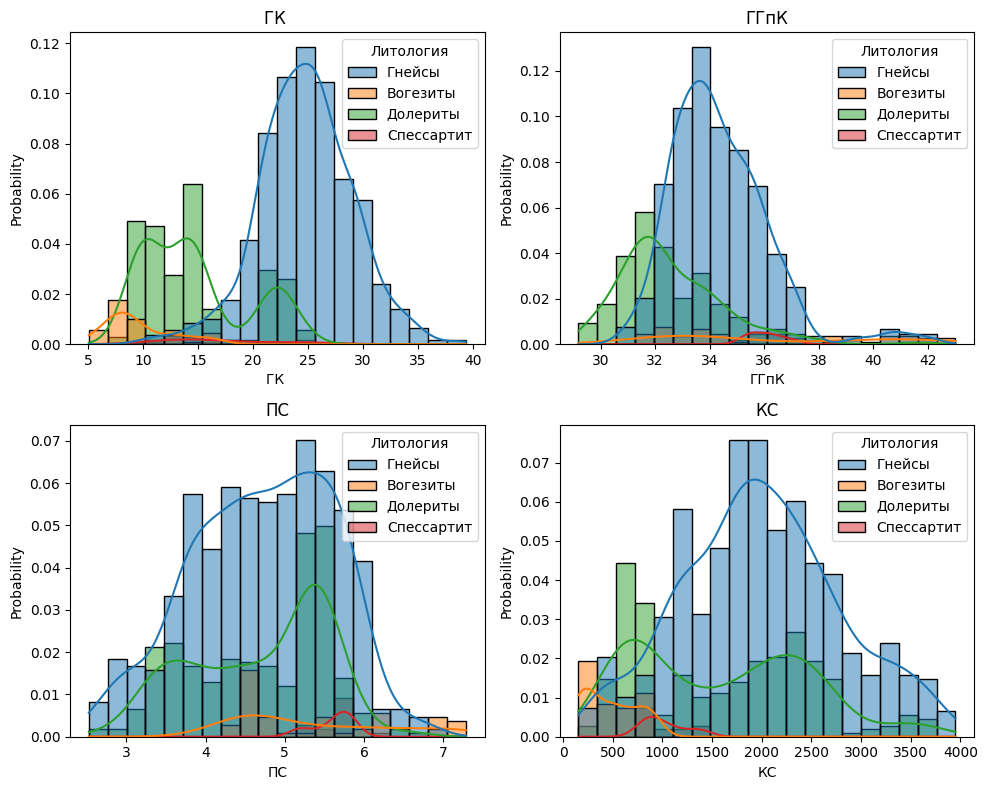

In [19]:
# Assuming 'data' is your DataFrame and it's already defined

fig = plt.figure(figsize=(10, 8))

parameters_list = [ 'ГК ', 'ГГпК', 'ПС', 'КС']

# Calculate appropriate subplot grid size
rows = 2
cols = (len(parameters_list) + 1) // rows

for index, param in enumerate(parameters_list):
    ax = plt.subplot(rows, cols, index + 1)
    sns.histplot(data=result_new, x=param, hue='Литология', stat="probability", kde=True, bins=20)
    plt.title(f'{param}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

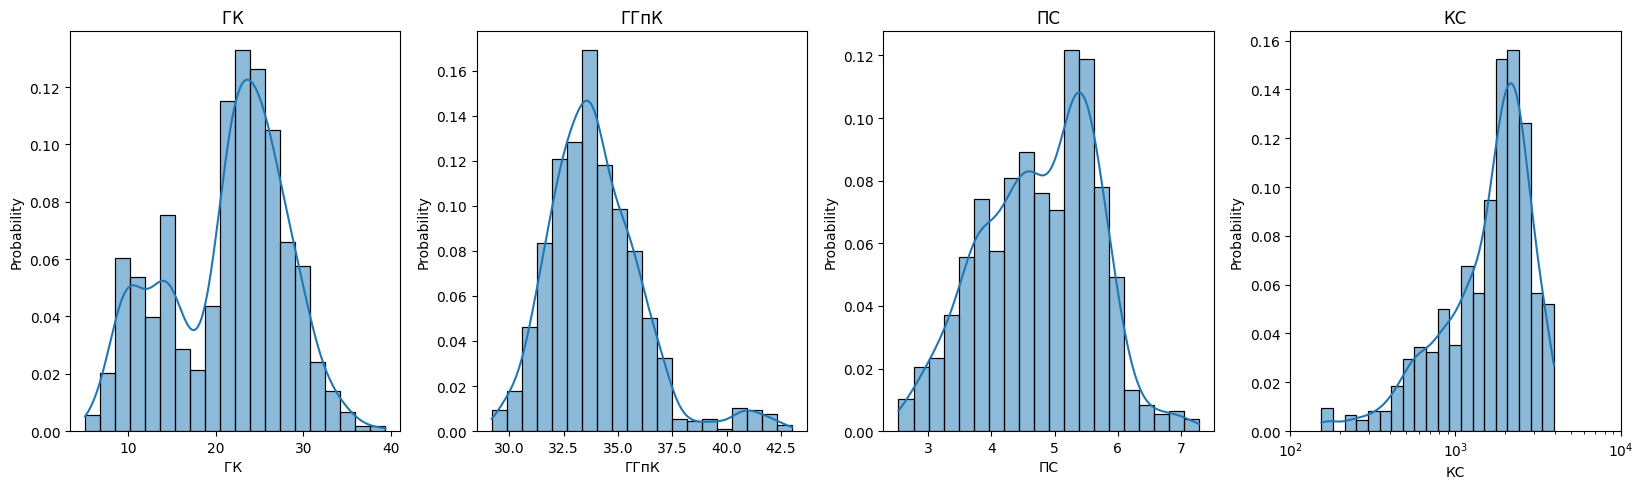

In [20]:
fig = plt.figure(figsize=(20, 5))


# Calculate appropriate subplot grid size
parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list) + 1) // rows

for index, name_log in enumerate(well_logs_merged.columns):

   if name_log != "Глубина":

    ax = plt.subplot(rows, cols, index + 1)

    if name_log  == "КС":
      sns.histplot(data=well_logs_merged, x=name_log, stat="probability", kde=True, bins=20, log_scale=(True, False))
      plt.title(f'{name_log}')
      ax.set_xlim(100, 10000)
    else:
      sns.histplot(data=well_logs_merged, x=name_log, stat="probability", kde=True, bins=20)
      plt.title(f'{name_log}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

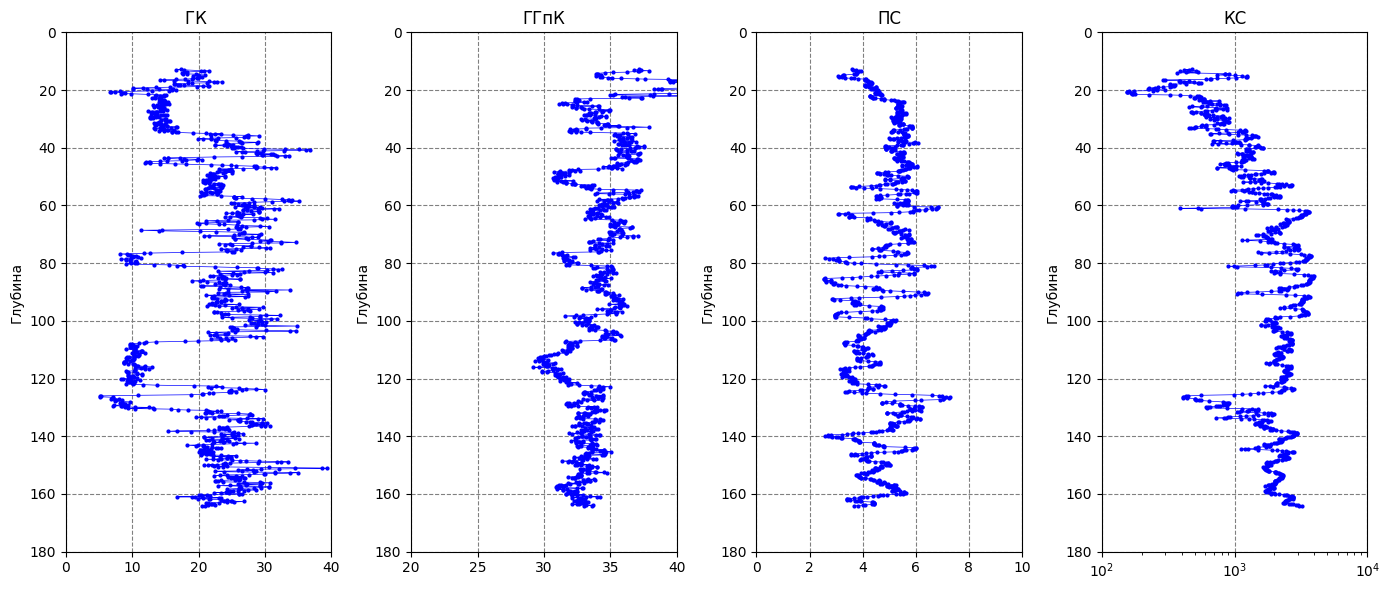

In [24]:
def initial_plot(ax, x, y, label_name):

    ax.plot(x, y, 'b-', marker='o',
            markersize=2,
            label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)

parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list)) // rows
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))

for index, name_log in enumerate(well_logs_merged.columns):
    if name_log != "Глубина":
        ax = axs[index-1]
        ax.set_ylabel(f"Глубина")
        ax.set_ylim(0, 180)
        ax.grid(color='gray', linestyle='--')
        initial_plot(ax, well_logs_merged[name_log], well_logs_merged['Глубина'], name_log)

plt.tight_layout()
plt.show()

In [21]:
unique_lithology_types = result_new['Литология'].unique()
print(unique_lithology_types)

['Гнейсы' 'Вогезиты' 'Долериты' 'Спессартит']


In [22]:
lithology_numbers = {0: {'lith':'Гнейсы', 'lith_num':0, 'hatch': '', 'color':'#bebebe'},
                 1: {'lith':'Вогезиты', 'lith_num':1, 'hatch':'', 'color':'#B89230'},
                 2: {'lith':'Долериты', 'lith_num':2, 'hatch':'', 'color':'#C0FDB6'},
                 3: {'lith':'Спессартит', 'lith_num':3, 'hatch':'', 'color':'#CCCC42'}}

In [23]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)
df_lith

,index,lith,lith_num,hatch,color
0,0,Гнейсы,0,,#bebebe
1,1,Вогезиты,1,,#B89230
2,2,Долериты,2,,#C0FDB6
3,3,Спессартит,3,,#CCCC42


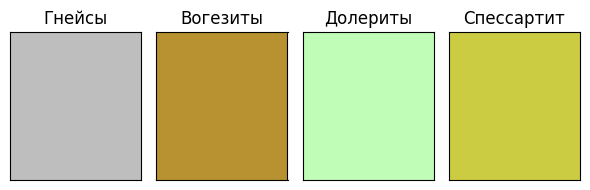

In [24]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=1, sharex=True, sharey=True,
                         figsize=(6,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

In [25]:
lithology_array = []
hatch_array = []
color_array = []

work_layers_initial = result_new

for row_index, row in enumerate(work_layers_initial.itertuples()):

    lithology = work_layers_initial.at[row.Index, 'Литология']
    # layers_name = work_layers_initial.at[row.Index, 'Event_name']
    # print(lithology)

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)


    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial["Lithology"] = lithology_array
work_layers_initial["Index"] = hatch_array
work_layers_initial["Color"] = color_array
work_layers_initial # для построения графиков с литологией

,Глубина,Литология,ГК,ГГпК,ПС,КС,Lithology,Index,Color
0,12.8,Гнейсы,17.27,37.18,3.6066,474.61,0,,#bebebe
1,12.9,Гнейсы,16.55,37.31333,3.6258,416.4,0,,#bebebe
2,13.0,Гнейсы,17.76,36.765,3.7374,452.74,0,,#bebebe
3,13.3,Гнейсы,20.77,37.88667,3.7362,511.12,0,,#bebebe
4,13.4,Гнейсы,21.58,37.17333,3.8441,443.1,0,,#bebebe
...,...,...,...,...,...,...,...,...,...
1076,163.6,Гнейсы,22.32,32.135,4.4133,2747.14,0,,#bebebe
1077,163.8,Гнейсы,22.5,33.155,4.0983,2904.53,0,,#bebebe
1078,163.9,Гнейсы,21.41,33.695,3.9994,2989.96,0,,#bebebe
1079,164.0,Гнейсы,20.49,33.65333,3.8284,3060.61,0,,#bebebe


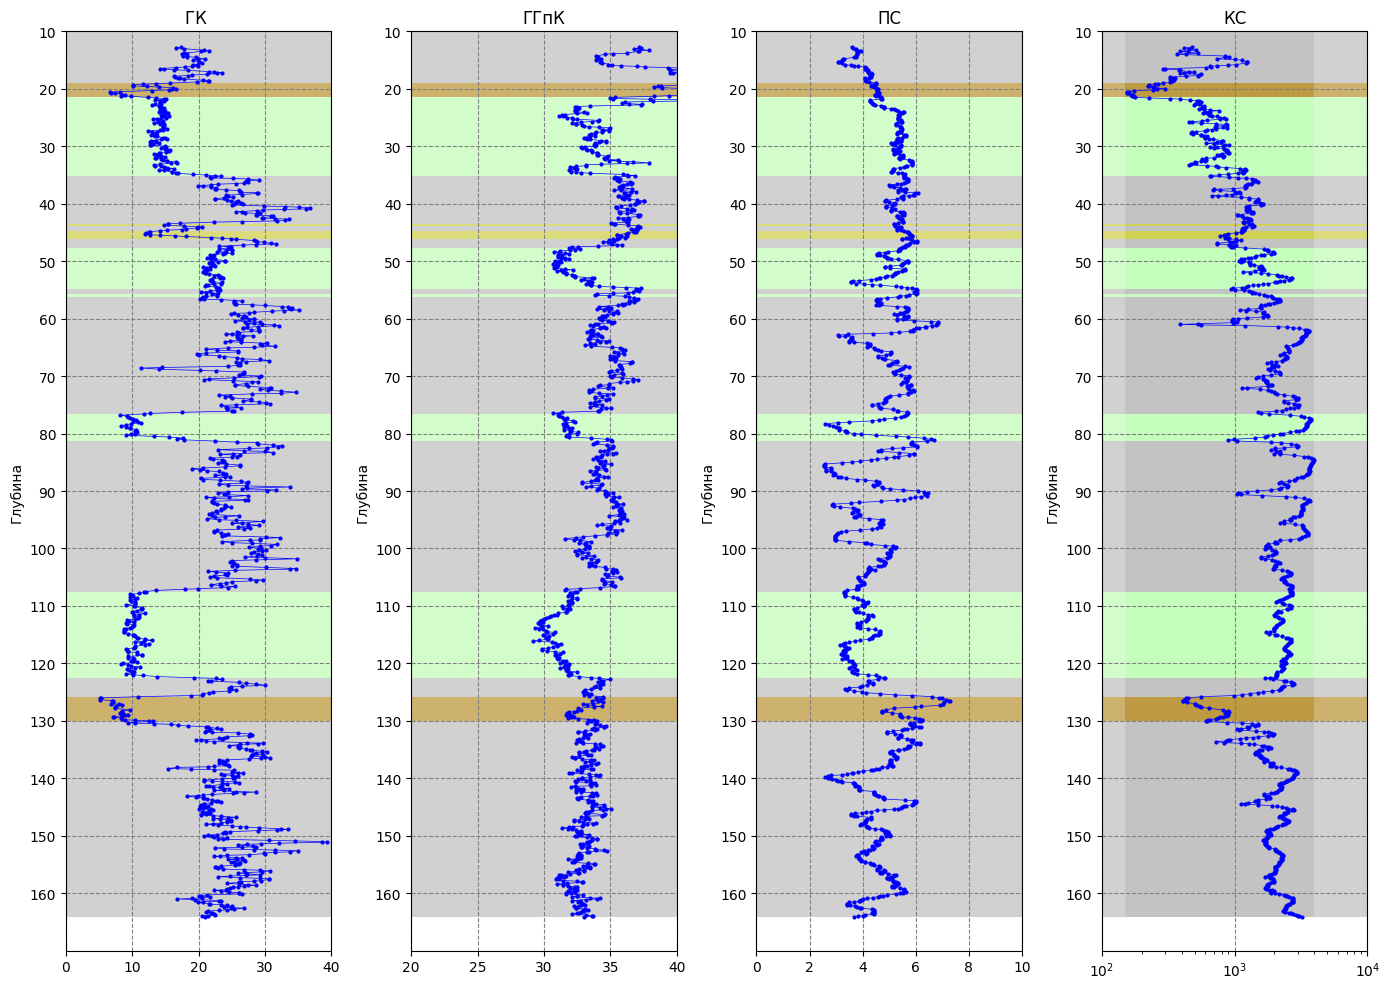

In [26]:
def initial_plot(ax, x, y, label_name, lithology_data):
    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(work_layers_initial.index,work_layers_initial['Глубина']):

      key = int(lit)
      color = work_layers_initial.at[lit, 'Color']
      hatch = work_layers_initial.at[lit, 'Index']


      depth_values = [depth_start, depth]
      depth_start = depth

      ax.fill_betweenx(depth_values,
                       (min(x) // 10) * 10, (np.round(max(x)+1, -1) // 10) * 10,
                       facecolor=color, hatch=hatch, alpha=0.7)

      if x.name == "КС":
        ax.fill_betweenx(depth_values, 100, 10000,
                       facecolor=color, hatch=hatch, alpha=0.7)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)


parameters_list = [col_name for col_name in well_logs.columns if 'Глубина' not in col_name]
rows = 1
cols = (len(parameters_list)) // rows
fig, axs = plt.subplots(rows, cols, figsize=(14, 10))

for index, name_log in enumerate(well_logs_merged.columns):
    if name_log != "Глубина":
        ax = axs[index-1]
        ax.set_ylabel(f"Глубина")
        ax.set_ylim(10, 170)
        ax.set_yticks(np.arange(10, 170, 10))
        ax.grid(color='gray', linestyle='--')
        initial_plot(ax, well_logs_merged[name_log], well_logs_merged['Глубина'], name_log, result_new['Литология'])

plt.tight_layout()
plt.show()

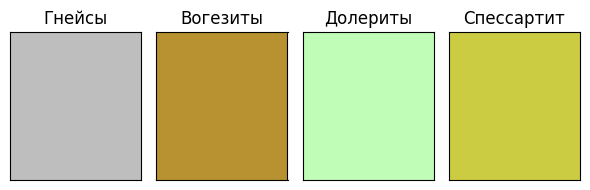

In [27]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=1, sharex=True, sharey=True,
                         figsize=(6,2), subplot_kw={'xticks': [], 'yticks': []})

for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

### Сравнение осредение ЕМ и МОЕГО

In [44]:
thermal_logs = data[['Sample ID', 'Top Depth', 'Target', 'Offset', 'Depth_TC']]
thermal_logs = thermal_logs.drop(0)
thermal_logs.drop(['Top Depth', 'Offset'], axis=1, inplace=True)

In [45]:
path_to_ser = Path(output_file)
data_EM_initial = pd.read_excel(path_to_ser, sheet_name='НТПК_ЕМ', skiprows=0)
data_EM = data_EM_initial.copy()

In [46]:
data_EM  = data_EM.drop([0, 1])

In [50]:
data_EM.columns

Index(['Depth of mindow (centre), m', 'Unnamed: 1', 'Window size=30 cm',
       'Unnamed: 3', 'Window size=40 cm', 'Unnamed: 5', 'Window size=50 cm',
       'Unnamed: 7', 'Window size=1  m', 'Unnamed: 9', 'TC original'],
      dtype='object')

In [48]:
thermal_logs

,Sample ID,Target,Depth_TC
1,625,2.555,30.525
2,625,2.556,30.526
3,625,2.52,30.527
4,625,2.541,30.528
5,625,2.566,30.529
...,...,...,...
97763,1,3.023,164.974
97764,1,3.151,164.975
97765,1,3.183,164.976
97766,1,2.959,164.977


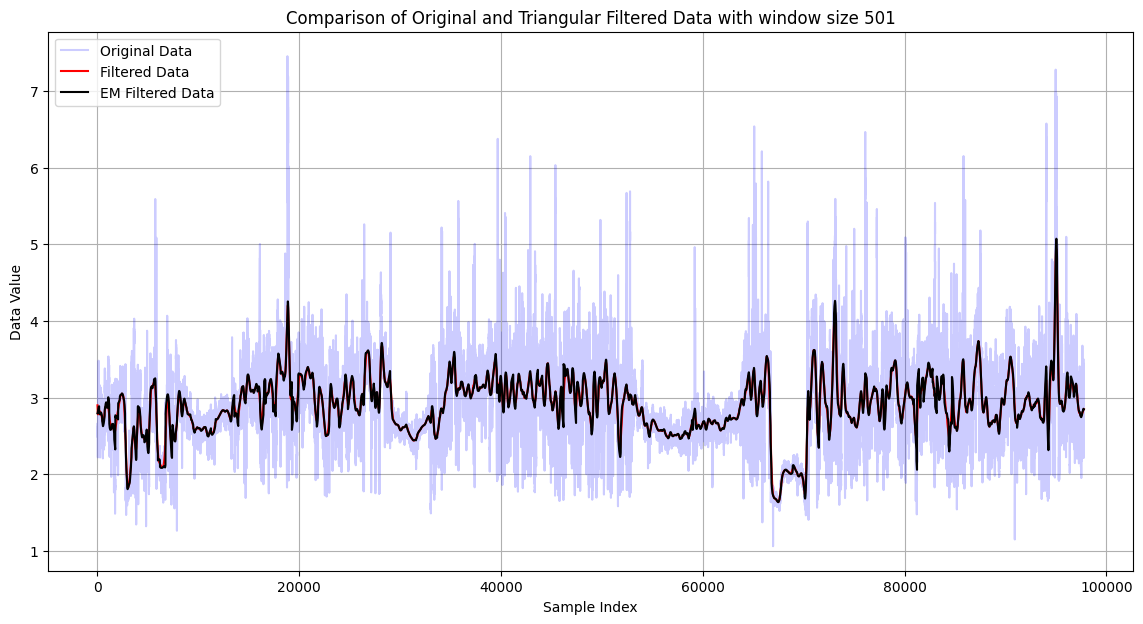

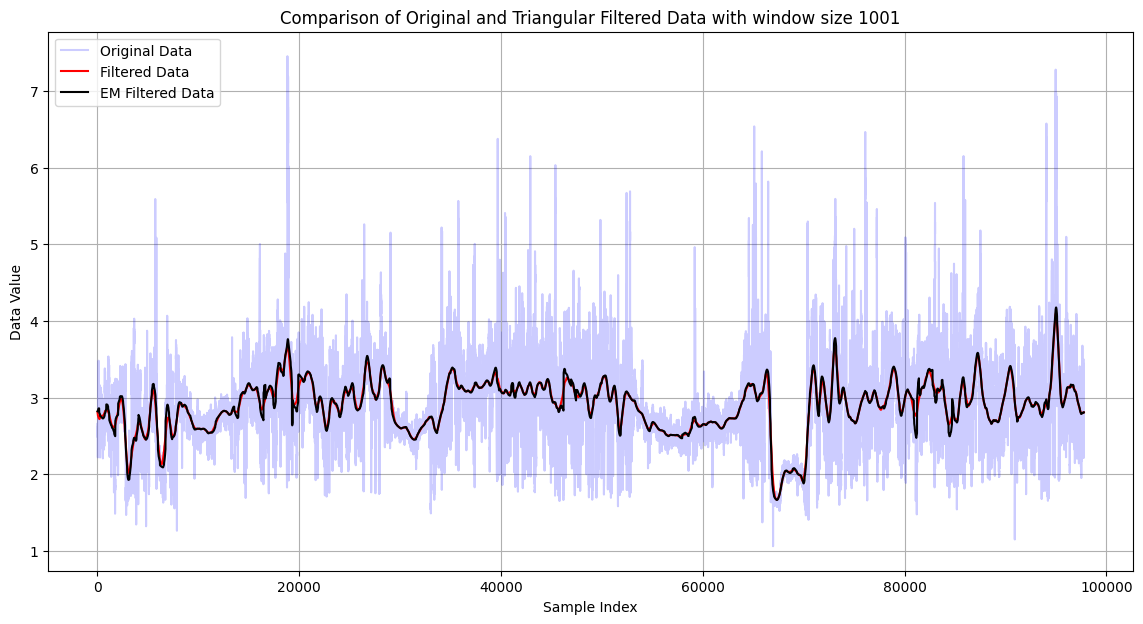

In [51]:
def triangular_filter(data, window_size): # Осреднение в треугольном фильтре
    """Applies a non-recursive triangular filter to the data"""
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    half_window = window_size // 2
    filtered_data = np.zeros_like(data)

    for i in range(len(data)):
        start_index = max(0, i - half_window)
        end_index = min(len(data), i + half_window + 1)

        actual_window_length = end_index - start_index
        weights = np.concatenate((np.arange(1, half_window + 2),
                                  np.arange(half_window, 0, -1)))
        weights = weights[:actual_window_length]  # Adjust weights size to match the data segment
        weights = weights / weights.sum()  # Normalize weights

        filtered_data[i] = np.sum(data[start_index:end_index] * weights)

    return filtered_data


data = thermal_logs['Target']

window_size = [501, 1001]

for ws in window_size:

  filtered_data = triangular_filter(data, ws)

  # Plotting the results
  plt.figure(figsize=(14, 7))
  plt.plot(data, label='Original Data', color='blue', alpha=0.2)
  plt.plot(filtered_data, label='Filtered Data', color='red')
  if ws == 501:
    plt.plot(data_EM['Window size=50 cm'], label='EM Filtered Data', color='black')
  else:
    plt.plot(data_EM['Window size=1  m'], label='EM Filtered Data', color='black')

  plt.title(f'Comparison of Original and Triangular Filtered Data with window size {ws}')
  plt.xlabel('Sample Index')
  plt.ylabel('Data Value')
  plt.legend()
  plt.grid(True)
  plt.show()

### Новая обработка (по Чехонину)

In [41]:
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')

# path_to_ser = Path(output_file)
# data_initial = pd.read_excel(path_to_ser, sheet_name='Well logging', skiprows=0)
# data = data_initial.copy()

thermal_logs = data[['Sample ID', 'Top Depth', 'Target', 'Offset', 'Depth_TC']]
thermal_logs = thermal_logs.drop(0)
thermal_logs.drop(['Top Depth', 'Offset'], axis=1, inplace=True)

# # объединение данных ГИС с единой привязкой по глубине
# well_logs_merged

In [42]:
thermal_logs

,Sample ID,Target,Depth_TC
1,625,2.555,30.525
2,625,2.556,30.526
3,625,2.52,30.527
4,625,2.541,30.528
5,625,2.566,30.529
...,...,...,...
97763,1,3.023,164.974
97764,1,3.151,164.975
97765,1,3.183,164.976
97766,1,2.959,164.977


In [43]:
def filter_numeric_range(df, column_name, lower_bound, upper_bound, step):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    filtered_df = filtered_df.dropna()
    filtered_df['Глубина'] = filtered_df[column_name]
    return filtered_df.reset_index(drop=True)

In [44]:
# отфильтровать значения, которые не совпадают с ГИС (интревал 36,525 -164,978)
# lower_bound, upper_bound, step = 36.525, 164.978, 0.001
lower_bound, upper_bound, step = 36.5, 165, 0.001
thermal_logs_filtered = filter_numeric_range(thermal_logs, 'Depth_TC',
                                    lower_bound, upper_bound, step)
thermal_logs_filtered

,Sample ID,Target,Depth_TC,Глубина
0,645,2.646,36.500,36.500
1,645,2.666,36.501,36.501
2,645,2.692,36.502,36.502
3,645,2.765,36.503,36.503
4,645,2.758,36.504,36.504
...,...,...,...,...
97467,1,3.023,164.974,164.974
97468,1,3.151,164.975,164.975
97469,1,3.183,164.976,164.976
97470,1,2.959,164.977,164.977


In [45]:
thermal_logs_filtered.groupby('Sample ID')['Depth_TC'].agg(['min', 'max', 'mean', 'count', 'median'])

,min,max,mean,count,median
Sample ID,,,,,
1.0,164.805,164.978,164.8915,174,164.8915
2.0,164.665,164.776,164.7205,112,164.7205
3.0,164.525,164.646,164.5855,122,164.5855
4.0,164.105,164.501,164.3030,397,164.3030
5.0,163.965,164.093,164.0290,129,164.0290
...,...,...,...,...,...
641.0,37.135,37.202,37.1685,68,37.1685
642.0,37.015,37.103,37.0590,89,37.0590
643.0,36.815,36.975,36.8950,161,36.8950


### Oсредненнение данных ТС/VHC в треугольном фильтре

Данные по ТС усредненны в треугольном фильтре перед выборкой по образцам

In [46]:
def triangular_filter(data, window_size):
    """Applies a non-recursive triangular filter to the data"""
    if window_size % 2 == 0:
        raise ValueError("Window size must be odd.")

    half_window = window_size // 2
    filtered_data = np.zeros_like(data)

    for i in range(len(data)):
        start_index = max(0, i - half_window)
        end_index = min(len(data), i + half_window + 1)

        actual_window_length = end_index - start_index
        weights = np.concatenate((np.arange(1, half_window + 2),
                                  np.arange(half_window, 0, -1)))
        weights = weights[:actual_window_length]  # Adjust weights size to match the data segment
        weights = weights / weights.sum()  # Normalize weights

        filtered_data[i] = np.sum(data[start_index:end_index] * weights)

    return filtered_data

In [47]:
data = thermal_logs_filtered['Target']
filtered_tc_triangle = triangular_filter(data, 501)

In [48]:
data_tc_filtered = pd.DataFrame(thermal_logs_filtered["Depth_TC"])
data_tc_filtered['Sample ID'] = thermal_logs_filtered['Sample ID']
data_tc_filtered['TC filt tri'] = filtered_tc_triangle

In [49]:
data_tc_filtered

,Depth_TC,Sample ID,TC filt tri
0,36.500,645,2.699304
1,36.501,645,2.698494
2,36.502,645,2.698033
3,36.503,645,2.69729
4,36.504,645,2.697068
...,...,...,...
97467,164.974,1,2.848046
97468,164.975,1,2.848257
97469,164.976,1,2.848441
97470,164.977,1,2.848589


NameError: name 'data_EM' is not defined

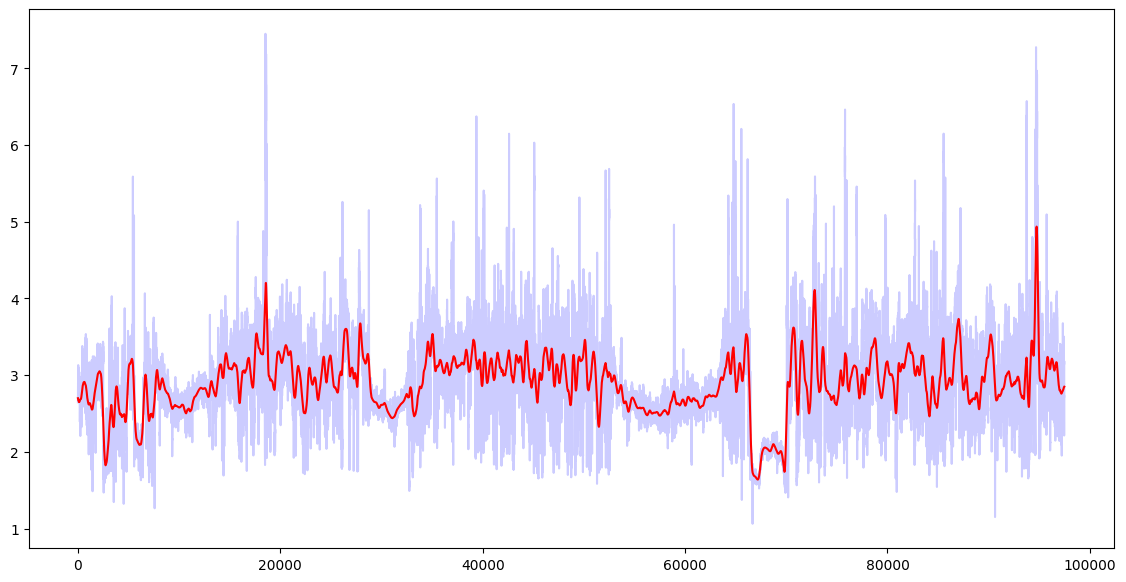

In [50]:
 # Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data, label='Original Data', color='blue', alpha=0.2)
plt.plot(data_tc_filtered['TC filt tri'], label='Filtered Data', color='red')
plt.plot(data_EM['Window size=50 cm'], label='EM Filtered Data', color='black')
# plt.plot(data_EM['Window size=1  m'], label='EM Filtered Data', color='black')

# plt.title(f'Comparison of Original and Triangular Filtered Data with window size {ws}')
plt.xlabel('Sample Index')
plt.ylabel('Data Value')
plt.legend()
plt.grid(True)
plt.show()

Привязка усредненого ТС к образцам (выбор одного значения ТС для образца)

In [51]:
data_set_new_filtered = data_tc_filtered.groupby('Sample ID').agg({
    'TC filt tri': 'mean',
    'Depth_TC': 'median'
}).reset_index()

# Rename the columns for clarity
data_set_new_filtered.columns = ['Sample ID', 'Average Target', 'Median Depth TC']

data_set_new_filtered ['Median Depth TC'] = data_set_new_filtered ['Median Depth TC'].astype(float)
data_set_new_filtered ['Median Depth TC'] = np.round(data_set_new_filtered ['Median Depth TC'], 3)

data_set_new_filtered_by_depth = data_set_new_filtered.sort_values('Median Depth TC')

data_set_new_filtered

,Sample ID,Average Target,Median Depth TC
0,1.0,2.820684,164.892
1,2.0,2.773092,164.721
2,3.0,2.776396,164.586
3,4.0,2.968252,164.303
4,5.0,3.126449,164.029
...,...,...,...
648,641.0,2.890596,37.169
649,642.0,2.842788,37.059
650,643.0,2.718206,36.895
651,644.0,2.675391,36.758


In [52]:
data_set_new_filtered_by_depth[(data_set_new_filtered_by_depth['Median Depth TC'] > 109) & \
                               (data_set_new_filtered_by_depth['Median Depth TC'] < 110)]

,Sample ID,Average Target,Median Depth TC
420,414.0,2.601935,109.032
419,413.0,2.536789,109.175
418,412.0,2.53279,109.288
417,411.0,2.567858,109.421
416,410.0,2.621422,109.534
415,409.0,2.674916,109.656


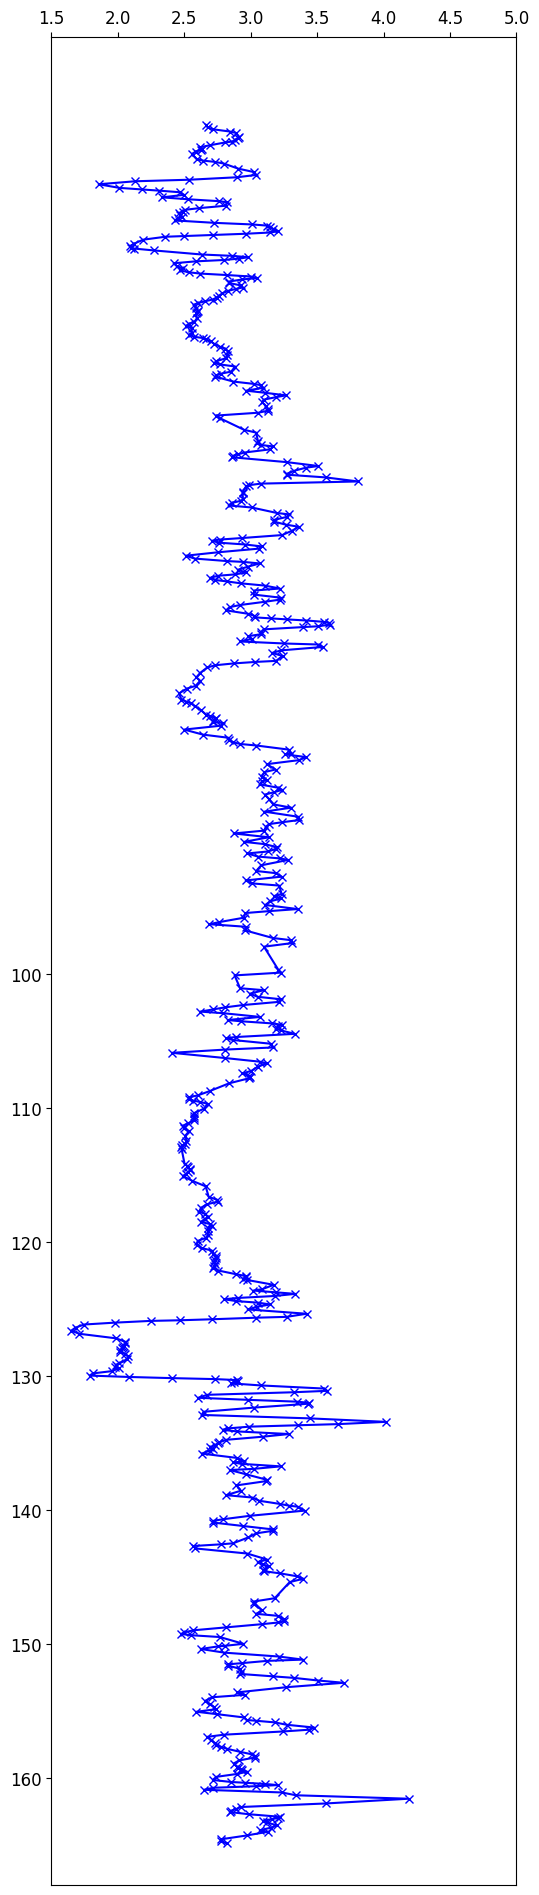

In [53]:
fig, ax1 = plt.subplots(figsize=(6, 24))

# x, y = data_set_new['Average Target'], data_set_new['Median Depth TC']
# ax1.scatter(x, y, label='Not Filter before', marker='o', s=1, color='red')  # Use 's' instead of 'markersize'

x, y = data_set_new_filtered_by_depth['Average Target'], data_set_new_filtered_by_depth['Median Depth TC']
ax1.plot(x, y, label='Not Filter before', marker='x', color='blue')  # Use 's' instead of 'markersize'
# ax1.scatter(x, y, label='Not Filter before', marker='x', color='blue')  # Use 's' instead of 'markersize'


# Set axis limits and ticks
ax1.set_xlim(1.5, 5)
ax1.set_ylim(30, 168)
ax1.set_yticks(np.arange(100, 165, 10))
ax1.invert_yaxis()  # Invert the y-axis for the first plot
ax1.xaxis.tick_top()  # Move the x-axis to the top

# Increase font size for tick labels
ax1.tick_params(axis='both', which='major', labelsize=12)

### Добавление ГИС к НТПК

Интерполяция данных ГИС

In [54]:
from scipy.interpolate import interp1d

def interpolation(x, y, new_dataframe, new_depth):

  interp_function = interp1d(x, y,
                            kind='linear',
                            bounds_error=False,
                             fill_value="extrapolate")

  # Interpolate the data to new depth
  interpolated_values = interp_function(new_depths)

  # Create a new DataFrame with the interpolated results
  new_dataframe[x.name] = new_depths
  new_dataframe[y.name] = interpolated_values

  return new_dataframe

Данным НТПК интревал 36,525 -164,978 (нобучение)

In [55]:
# well_logs_merged - объединенные данные ГИС с единой привязкой по глубине

interpolated_df = pd.DataFrame()
new_dataframe = interpolated_df

# new_depths = np.arange(36.525, 164.979, 0.001)
new_depths = np.arange(36.5, 165, 0.001)

interpolation(well_logs_merged['Глубина'], well_logs_merged['ГК '], new_dataframe, new_depths) # ГК
interpolation(well_logs_merged['Глубина'], well_logs_merged['ГГпК'], new_dataframe, new_depths) # ГГпК
interpolation(well_logs_merged['Глубина'], well_logs_merged['ПС'], new_dataframe, new_depths) # ПС
interpolation(well_logs_merged['Глубина'], well_logs_merged['КС'], new_dataframe, new_depths) # КС
# interpolation(new_data_filtered['Depth_TC'], new_data_filtered['TC filt tri'], new_dataframe, new_depths) # НТКП

# interpolated_df.drop(['Depth_TC'], axis=1, inplace=True)
interpolated_df.rename(columns={'Глубина': 'Median Depth TC'}, inplace=True)
interpolated_df['Median Depth TC'] = interpolated_df['Median Depth TC'].astype(float)
interpolated_df['Median Depth TC'] = np.round(interpolated_df['Median Depth TC'], 3)

interpolated_df

,Median Depth TC,ГК,ГГпК,ПС,КС
0,36.500,25.5600,36.580000,5.438600,1323.5800
1,36.501,25.5329,36.576733,5.437105,1323.0769
2,36.502,25.5058,36.573467,5.435610,1322.5738
3,36.503,25.4787,36.570200,5.434115,1322.0707
4,36.504,25.4516,36.566933,5.432620,1321.5676
...,...,...,...,...,...
128495,164.995,24.5695,27.086330,2.306050,4691.5145
128496,164.996,24.5736,27.079730,2.304520,4693.1536
128497,164.997,24.5777,27.073130,2.302990,4694.7927
128498,164.998,24.5818,27.066530,2.301460,4696.4318


In [56]:
data_set_new_filtered.columns

Index(['Sample ID', 'Average Target', 'Median Depth TC'], dtype='object')

merged_data - целевая информация (ГИС увязан к НТПК для каждого образца)

In [57]:
merged_data = pd.merge(data_set_new_filtered, interpolated_df, on='Median Depth TC')
merged_data['Average Target']=merged_data['Average Target'].astype(float)

merged_data .rename(columns={'Median Depth TC':'Глубина'}, inplace=True)
merged_data .rename(columns={'Average Target':'НТПК'}, inplace=True)

In [58]:
merged_data

,Sample ID,НТПК,Глубина,ГК,ГГпК,ПС,КС
0,1.0,2.820684,164.892,24.14720,27.766130,2.463640,4522.6872
1,2.0,2.773092,164.721,23.44610,28.894730,2.725270,4242.4011
2,3.0,2.776396,164.586,22.89260,29.785730,2.931820,4021.1226
3,4.0,2.968252,164.303,21.73230,31.653530,3.364810,3557.2573
4,5.0,3.126449,164.029,20.60890,33.461930,3.784030,3108.1439
...,...,...,...,...,...,...,...
648,641.0,2.890596,37.169,22.40650,35.762602,5.337446,1208.9019
649,642.0,2.842788,37.059,21.32800,35.704735,5.163772,1211.4057
650,643.0,2.718206,36.895,20.01825,35.934330,5.020267,1215.6040
651,644.0,2.675391,36.758,21.34030,35.961730,4.991977,1218.1796


In [59]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample ID  653 non-null    float64
 1   НТПК       653 non-null    float64
 2   Глубина    653 non-null    float64
 3   ГК         653 non-null    float64
 4   ГГпК       653 non-null    float64
 5   ПС         653 non-null    float64
 6   КС         653 non-null    float64
dtypes: float64(7)
memory usage: 35.8 KB


Добавление литологии

In [60]:
# path_to_ser = Path('/content/Ros/Data/Rosatom_dataset.xlsx')
# path_to_ser = Path('/content/Rosatom_dataset.xlsx')


path_to_ser = Path(output_file)
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [61]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [62]:
interpolated_df_lith = pd.merge(
    lit_func(lithology, merged_data),
    merged_data,
    on='Глубина',
    how='inner'
)

In [63]:
interpolated_df_lith

,Глубина,Литология,Sample ID,НТПК,ГК,ГГпК,ПС,КС
0,164.892,Гнейсы,1.0,2.820684,24.14720,27.766130,2.463640,4522.6872
1,164.721,Гнейсы,2.0,2.773092,23.44610,28.894730,2.725270,4242.4011
2,164.586,Гнейсы,3.0,2.776396,22.89260,29.785730,2.931820,4021.1226
3,164.303,Гнейсы,4.0,2.968252,21.73230,31.653530,3.364810,3557.2573
4,164.029,Гнейсы,5.0,3.126449,20.60890,33.461930,3.784030,3108.1439
...,...,...,...,...,...,...,...,...
648,37.169,Гнейсы,641.0,2.890596,22.40650,35.762602,5.337446,1208.9019
649,37.059,Гнейсы,642.0,2.842788,21.32800,35.704735,5.163772,1211.4057
650,36.895,Гнейсы,643.0,2.718206,20.01825,35.934330,5.020267,1215.6040
651,36.758,Гнейсы,644.0,2.675391,21.34030,35.961730,4.991977,1218.1796


In [64]:
interpolated_df_lith.to_excel(f'data_to_train_{target}.xlsx', index=False)

In [65]:
unique_lithology_types = interpolated_df_lith['Литология'].unique()
print(unique_lithology_types)

['Гнейсы' 'Вогезиты' 'Долериты' 'Спессартит']


In [66]:
lithology_numbers = {0: {'lith':'Гнейсы', 'lith_num':0, 'hatch': '', 'color':'#bebebe'},
                 1: {'lith':'Вогезиты', 'lith_num':1, 'hatch':'', 'color':'#B89230'},
                 2: {'lith':'Долериты', 'lith_num':2, 'hatch':'', 'color':'#C0FDB6'},
                 3: {'lith':'Спессартит', 'lith_num':3, 'hatch':'', 'color':'#CCCC42'}}

In [67]:
df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.reset_index(inplace=True)
df_lith

,index,lith,lith_num,hatch,color
0,0,Гнейсы,0,,#bebebe
1,1,Вогезиты,1,,#B89230
2,2,Долериты,2,,#C0FDB6
3,3,Спессартит,3,,#CCCC42


In [68]:
# добавление литологии и цветов

lithology_array = []
hatch_array = []
color_array = []

work_layers_initial_new = interpolated_df_lith

# path_to_ser = Path('/content/output_data.xlsx')
# df = pd.read_excel(path_to_ser, skiprows=0)
# work_layers_initial_new = df.copy()

for row_index, row in enumerate(work_layers_initial_new.itertuples()):

    lithology = work_layers_initial_new.at[row.Index, 'Литология']

    lit_num = df_lith.loc[df_lith['lith'] == str(lithology), 'index'].iloc[0]
    lithology_array.append(lit_num)

    hatch_val = df_lith.loc[df_lith['lith'] == str(lithology), 'hatch'].iloc[0]
    hatch_array.append(hatch_val)

    color_val = df_lith.loc[df_lith['lith'] == str(lithology), 'color'].iloc[0]
    color_array.append(color_val)

work_layers_initial_new["Lithology"] = lithology_array
work_layers_initial_new["Index"] = hatch_array
work_layers_initial_new["Color"] = color_array
work_layers_initial_new # для построения графиков с литологией

,Глубина,Литология,Sample ID,НТПК,ГК,ГГпК,ПС,КС,Lithology,Index,Color
0,164.892,Гнейсы,1.0,2.820684,24.14720,27.766130,2.463640,4522.6872,0,,#bebebe
1,164.721,Гнейсы,2.0,2.773092,23.44610,28.894730,2.725270,4242.4011,0,,#bebebe
2,164.586,Гнейсы,3.0,2.776396,22.89260,29.785730,2.931820,4021.1226,0,,#bebebe
3,164.303,Гнейсы,4.0,2.968252,21.73230,31.653530,3.364810,3557.2573,0,,#bebebe
4,164.029,Гнейсы,5.0,3.126449,20.60890,33.461930,3.784030,3108.1439,0,,#bebebe
...,...,...,...,...,...,...,...,...,...,...,...
648,37.169,Гнейсы,641.0,2.890596,22.40650,35.762602,5.337446,1208.9019,0,,#bebebe
649,37.059,Гнейсы,642.0,2.842788,21.32800,35.704735,5.163772,1211.4057,0,,#bebebe
650,36.895,Гнейсы,643.0,2.718206,20.01825,35.934330,5.020267,1215.6040,0,,#bebebe
651,36.758,Гнейсы,644.0,2.675391,21.34030,35.961730,4.991977,1218.1796,0,,#bebebe


In [69]:
work_layers_initial_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Глубина    653 non-null    float64
 1   Литология  653 non-null    object 
 2   Sample ID  653 non-null    float64
 3   НТПК       653 non-null    float64
 4   ГК         653 non-null    float64
 5   ГГпК       653 non-null    float64
 6   ПС         653 non-null    float64
 7   КС         653 non-null    float64
 8   Lithology  653 non-null    int64  
 9   Index      653 non-null    object 
 10  Color      653 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 56.2+ KB


In [60]:
work_layers_initial_new.to_excel('output_data_lith.xlsx', index=False)

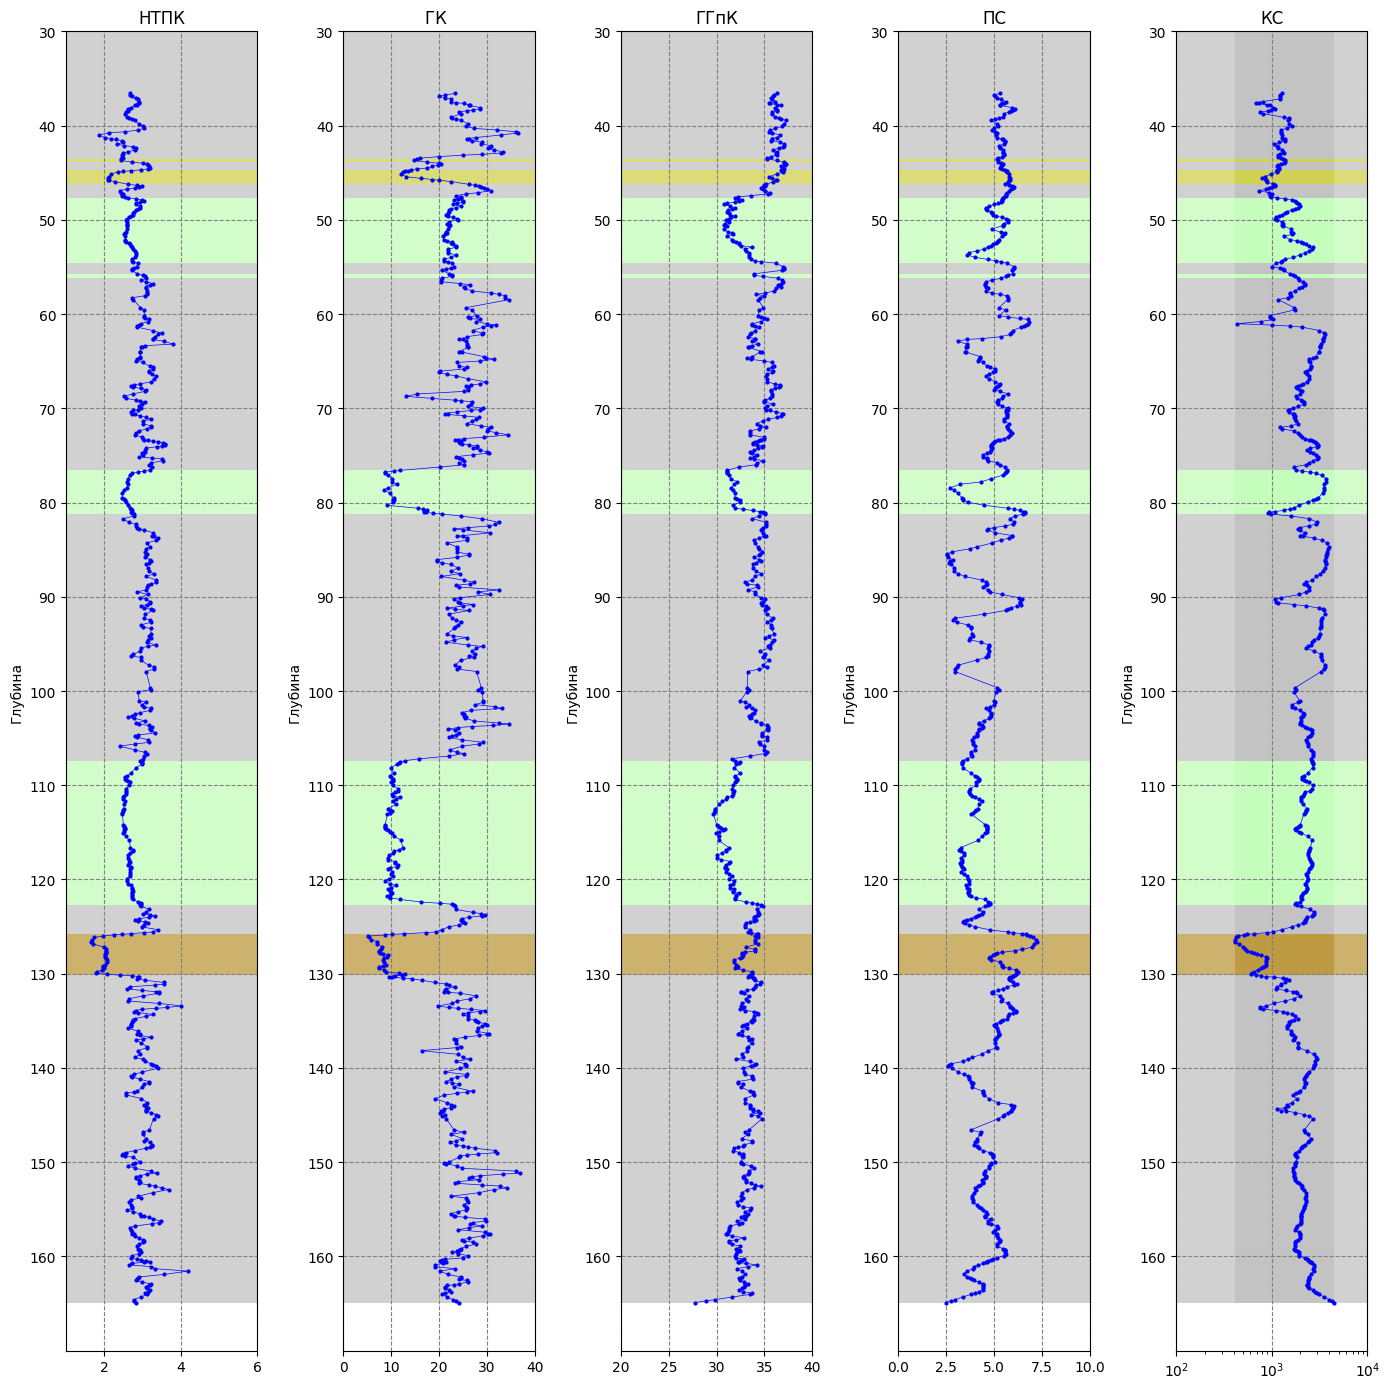

In [70]:
data = work_layers_initial_new.sort_values('Глубина')
# data = work_layers_initial_new #0.001m

def initial_plot(ax, x, y, label_name, lithology_data):

    lithology_data.index = range(1, len(lithology_data) + 1)
    ax.plot(x, y, 'b-', marker='o', markersize=2, label=label_name, lw=0.5)
    ax.invert_yaxis()
    ax.set_title(f'{label_name}')
    ax.set_xlim((min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10)

    depth_start = 0
    for lit, depth in zip(data.index, data['Глубина']):
        key = int(lit)
        color = data.at[lit, 'Color']
        hatch = data.at[lit, 'Index']

        depth_values = [depth_start, depth]
        depth_start = depth

        ax.fill_betweenx(depth_values,
                         (min(x) // 10) * 10, (np.round(max(x), -1) // 10) * 10,
                         facecolor=color, hatch=hatch, alpha=0.7)

        if x.name == "КС":
            ax.fill_betweenx(depth_values, 100, 10000,
                             facecolor=color, hatch=hatch, alpha=0.7)

        if x.name == "НТПК":
          ax.set_xlim(1, 6)
          ax.fill_betweenx(depth_values, 1,6,
                           facecolor=color, hatch=hatch, alpha=0.7)

    if x.name == "КС":
        ax.set_xscale('log')
        ax.set_xlim(100, 10000)


parametrs_list = ['Average Target', 'ГК ',
       'ГГпК', 'ПС']
parameters_list = [col_name for col_name in data.keys() if 'Глубина' not in col_name
                   and 'Литология' not in col_name
                   and 'Sample ID' not in col_name
                   and 'Lithology' not in col_name
                   and 'Index' not in col_name
                   and 'Color' not in col_name]


rows = 1
cols = len(parameters_list)
fig, axs = plt.subplots(rows, cols, figsize=(14, 14))

if cols == 1:
    axs = [axs]  # Make axs iterable if there is only one subplot

for index, name_log in enumerate(parameters_list):
    ax = axs[index]
    ax.set_ylabel("Глубина")
    ax.set_ylim(30, 170)
    ax.set_yticks(np.arange(30, 165, 10))
    ax.grid(color='gray', linestyle='--')

    initial_plot(ax, data[name_log], data['Глубина'], name_log, data['Литология'])

plt.tight_layout()
plt.show()

# Regression analysis

0.1m (привязка НТПК к ГИС)

In [72]:
# data = work_layers_initial_new.sort_values('Глубина')
data_set = work_layers_initial_new.copy()

0.1m
Pearson correlation coefficient (R): 0.472
Pearson correlation coefficient (R): 0.155
Pearson correlation coefficient (R): 0.214
Pearson correlation coefficient (R): 0.441


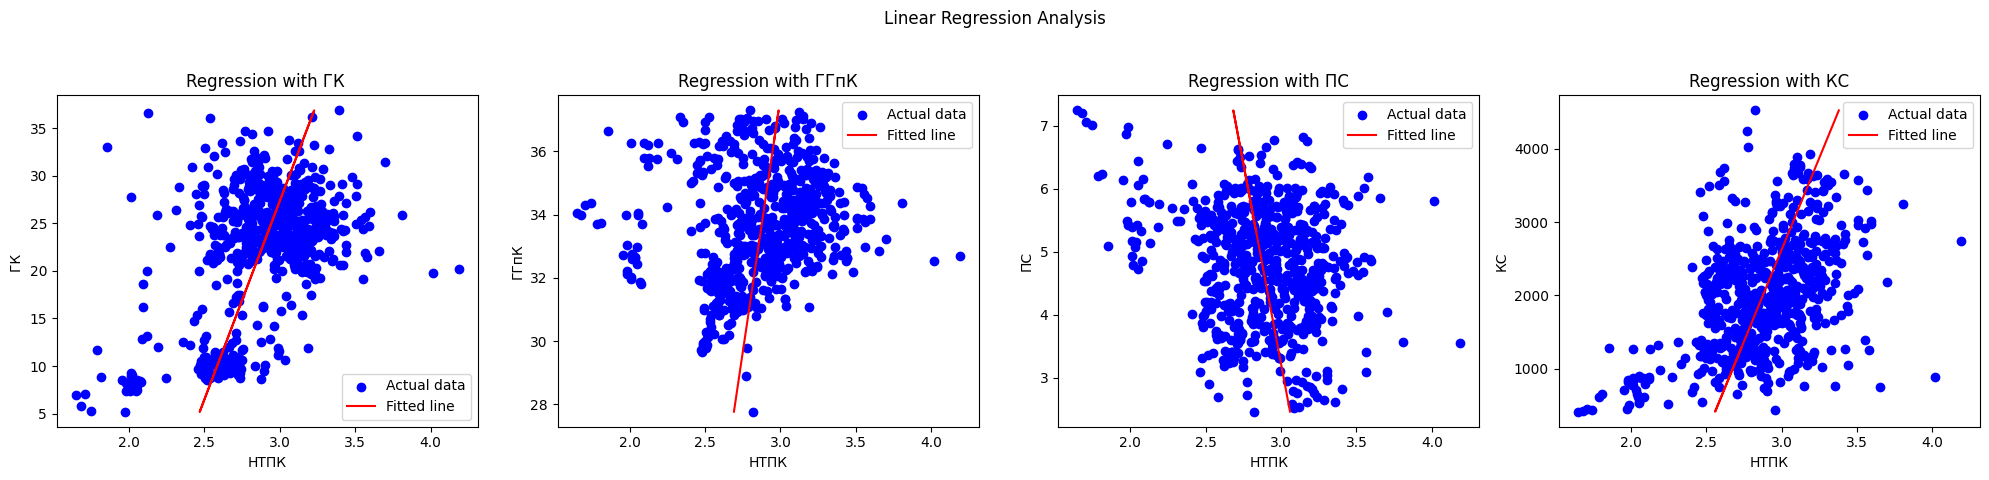

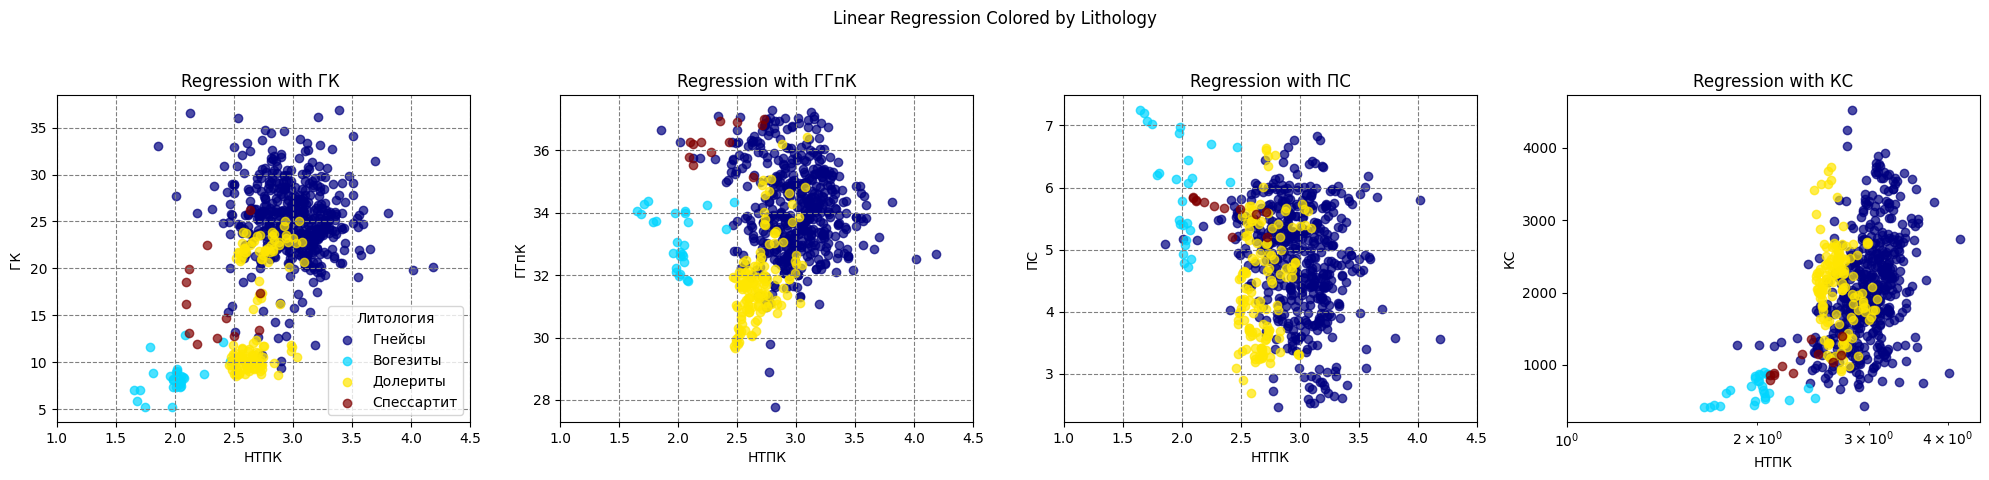

In [73]:
from sklearn.linear_model import LinearRegression

# data_set  = work_layers_initial_new #0.001m

X_reg = data_set[['ГК ', 'ГГпК', 'ПС', 'КС']]
y_reg = data_set['НТПК']

# without lithology
model = LinearRegression()

print('0.1m')
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))  # Adjust size as needed
fig.suptitle('Linear Regression Analysis')

columns = ['ГК ', 'ГГпК', 'ПС', 'КС']

for i, col in enumerate(columns):
    X_col = X_reg[[col]].values.reshape(-1, 1)
    model.fit(X_col, y_reg)
    y_pred = model.predict(X_col)
    corr, _ = pearsonr(y_reg, y_pred)
    print(f'Pearson correlation coefficient (R): {corr:.3f}')

    axes[i].scatter(y_reg, X_reg[col], color='blue', label='Actual data')
    axes[i].plot(y_pred, X_reg[col], color='red', label='Fitted line')

    # axes[i].scatter(X_reg[col], y, color='blue', label='Actual data')
    # axes[i].plot(X_reg[col], y_pred, color='red', label='Fitted line')
    axes[i].set_title(f'Regression with {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('НТПК')
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# with lithology
unique_categories = data_set['Литология'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_categories)))
color_map = dict(zip(unique_categories, colors))

model = LinearRegression()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle('Linear Regression Colored by Lithology')

columns = ['ГК ', 'ГГпК', 'ПС', 'КС']

for i, col in enumerate(columns):
    X_col = X_reg[[col]].values.reshape(-1, 1)
    model.fit(X_col, y_reg)

    y_pred = model.predict(X_col)

    point_colors = data_set['Литология'].map(color_map)

    for category in unique_categories:
        idx = data_set['Литология'] == category
        axes[i].scatter(y_reg[idx], X_reg[col][idx], color=color_map[category], label=category if i == 0 else "", alpha=0.7)

        if col == "КС":
          axes[i].set_xscale('log')
          axes[i].set_xlim(100, 10000)

        else:
          axes[i].grid(color='gray', linestyle='--')


    axes[i].set_title(f'Regression with {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('НТПК')
    axes[i].set_xlim(1, 4.5)

    if i == 0:
        axes[i].legend(title='Литология')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ML

## Data set preparation fot test - train

In [ ]:
### read data from sctreth

# path_to_ser = Path('/content/output_new.xlsx')
# data_initial = pd.read_excel(path_to_ser, skiprows=0)
# work_layers_initial_new = data_initial.copy()

In [74]:
work_layers_initial_new

,Глубина,Литология,Sample ID,НТПК,ГК,ГГпК,ПС,КС,Lithology,Index,Color
0,164.892,Гнейсы,1.0,2.820684,24.14720,27.766130,2.463640,4522.6872,0,,#bebebe
1,164.721,Гнейсы,2.0,2.773092,23.44610,28.894730,2.725270,4242.4011,0,,#bebebe
2,164.586,Гнейсы,3.0,2.776396,22.89260,29.785730,2.931820,4021.1226,0,,#bebebe
3,164.303,Гнейсы,4.0,2.968252,21.73230,31.653530,3.364810,3557.2573,0,,#bebebe
4,164.029,Гнейсы,5.0,3.126449,20.60890,33.461930,3.784030,3108.1439,0,,#bebebe
...,...,...,...,...,...,...,...,...,...,...,...
648,37.169,Гнейсы,641.0,2.890596,22.40650,35.762602,5.337446,1208.9019,0,,#bebebe
649,37.059,Гнейсы,642.0,2.842788,21.32800,35.704735,5.163772,1211.4057,0,,#bebebe
650,36.895,Гнейсы,643.0,2.718206,20.01825,35.934330,5.020267,1215.6040,0,,#bebebe
651,36.758,Гнейсы,644.0,2.675391,21.34030,35.961730,4.991977,1218.1796,0,,#bebebe


In [75]:
# dataset = data_set[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК']]
dataset = work_layers_initial_new[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология', 'НТПК']]
X = dataset[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология']]
y = dataset['НТПК']
n = len(X)

### Label encoding and normalization

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
categorical_clmn = X.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X[col] = LabelEncoder().fit_transform(X[col])

<Axes: >

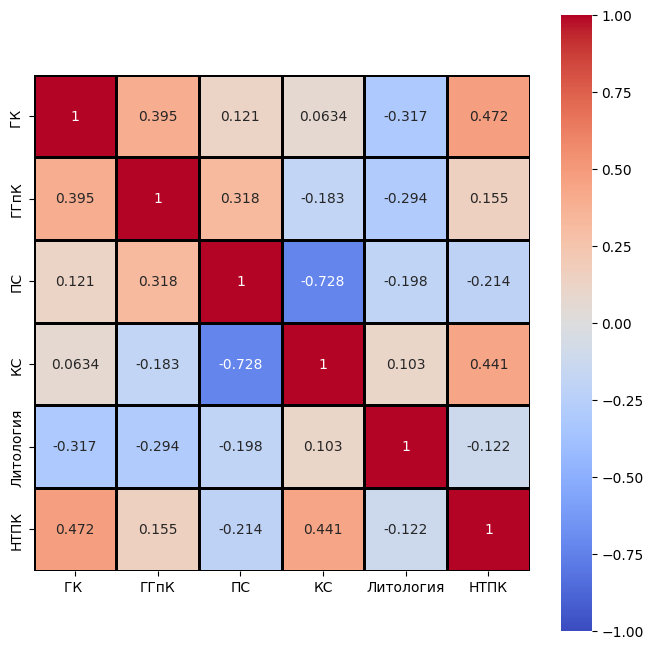

In [78]:
fig, ax = plt.subplots(figsize=(8,8))

categorical_clmn = dataset.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    dataset[col] = LabelEncoder().fit_transform(dataset[col])

sns.heatmap(dataset.corr(),fmt = '.3g', square=True, annot = True,
            vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',
            linewidths=1, linecolor='black')

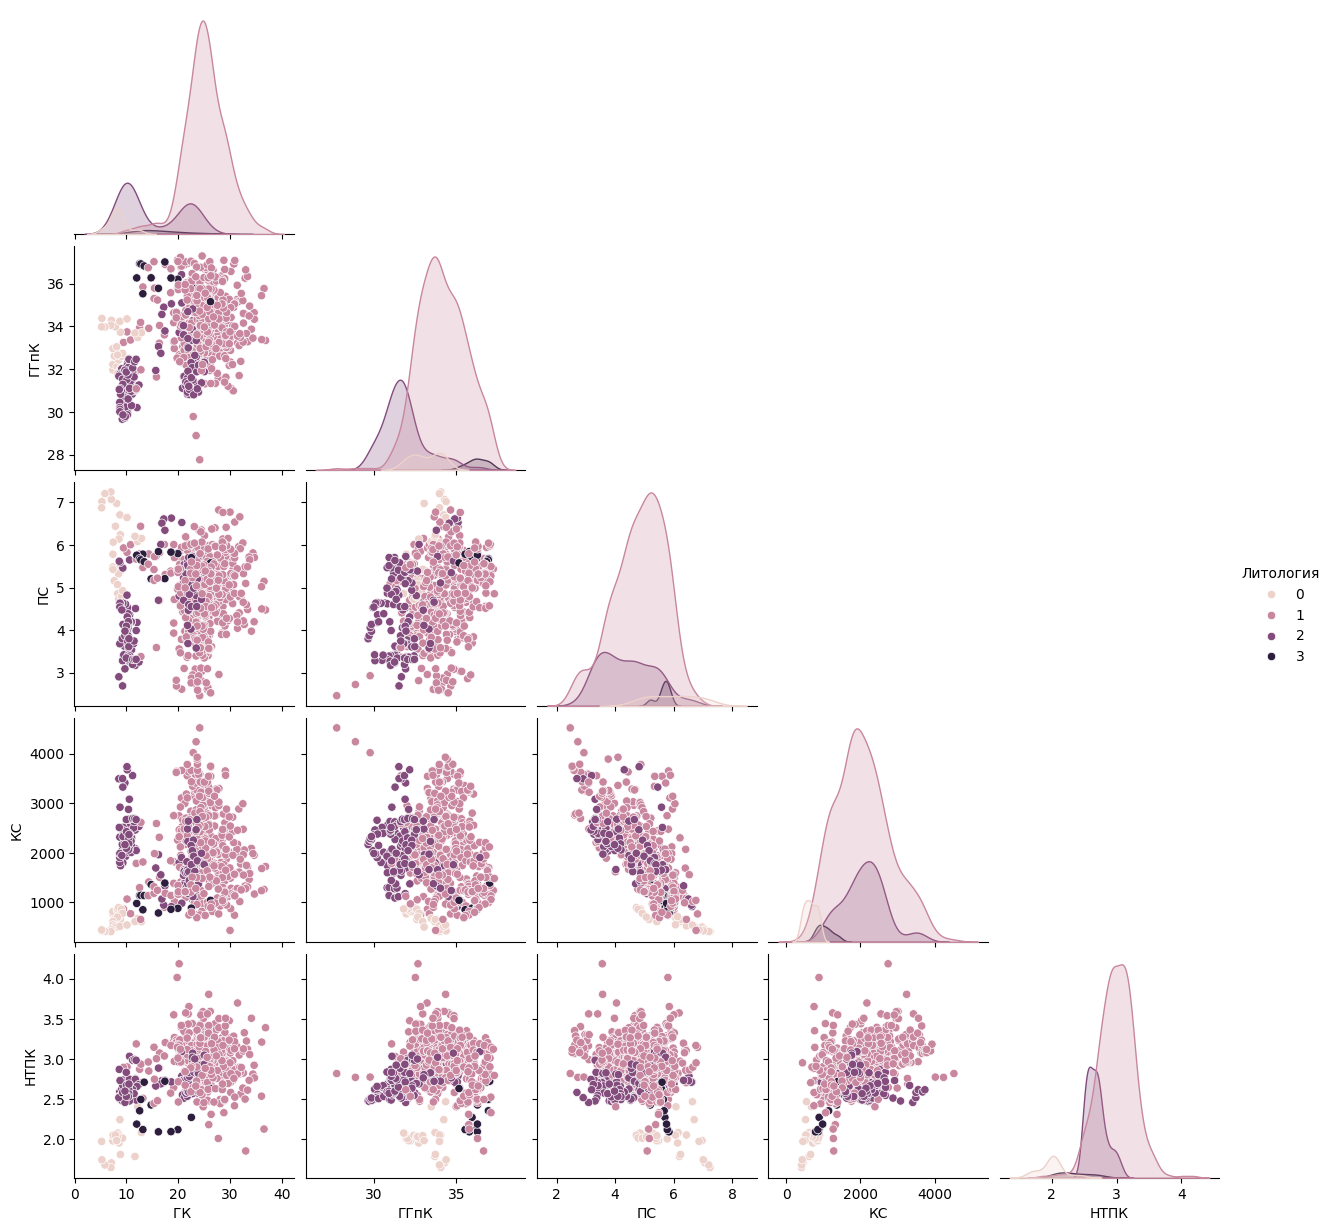

In [79]:
sns.pairplot(data=dataset,hue='Литология', corner=True)

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Select numerical columns (float64 and int64 types)
numerical_columns = ['ГК ', 'ГГпК', 'ПС', 'КС']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

print(X)

          ГК       ГГпК        ПС        КС  Литология
0    0.598506  0.000000  0.000000  1.000000          1
1    0.576350  0.118475  0.054727  0.931806          1
2    0.558858  0.212008  0.097932  0.877968          1
3    0.522190  0.408080  0.188503  0.765108          1
4    0.486688  0.597917  0.276194  0.655838          1
..        ...       ...       ...       ...        ...
648  0.543496  0.839430  0.601132  0.193747          1
649  0.509413  0.833356  0.564803  0.194356          1
650  0.468023  0.857457  0.534785  0.195378          1
651  0.509802  0.860334  0.528868  0.196005          1
652  0.574640  0.897803  0.597273  0.211856          1

[653 rows x 5 columns]


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.2), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.2), random_state=0xC0FFEE)

InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 0 instead.

In [ ]:
X.shape, X_val.shape, X_test.shape, X_train.shape,

Без валидационного датасета

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=int(len(y)*0.2), random_state=0xC0FFEE,
                                                    stratify=X['Литология'])



In [104]:
X.shape, X_test.shape, X_train.shape,

((653, 5), (130, 5), (523, 5))

In [105]:
from sklearn.utils import resample

X_bootstrap, y_bootstrap = resample(X_train, y_train, n_samples=len(X), random_state=0xC0FFEE)

In [106]:
X_bootstrap, y_bootstrap

(          ГК       ГГпК        ПС        КС  Литология
 468  0.574710  0.760261  0.576616  0.395155          1
 177  0.287693  0.645373  0.695628  0.243621          1
 208  0.154920  0.691173  0.874404  0.032394          0
 19   0.472989  0.515571  0.229409  0.567927          1
 166  0.712457  0.585690  0.596454  0.379025          1
 ..        ...       ...       ...       ...        ...
 212  0.486243  0.598407  0.483820  0.208438          1
 416  0.165412  0.448870  0.352417  0.459793          2
 389  0.425586  0.765339  0.871550  0.122772          2
 413  0.197919  0.406485  0.268273  0.539641          2
 176  0.353623  0.659147  0.701649  0.266442          1
 
 [653 rows x 5 columns],
 468    2.822026
 177    2.851879
 208    2.469903
 19     4.188147
 166    3.021351
          ...   
 212    3.420121
 416    2.621422
 389    2.716238
 413    2.569801
 176    3.076154
 Name: НТПК, Length: 653, dtype: float64)

In [107]:
X_train.nunique()

,0
ГК,523
ГГпК,523
ПС,523
КС,523
Литология,4


In [108]:
X_train, y_train = X_bootstrap, y_bootstrap

In [109]:
X_train.shape, y_train.shape,

((653, 5), (653,))

In [110]:
X_train.nunique(), X_test.nunique()

(ГК           377
 ГГпК         377
 ПС           377
 КС           377
 Литология      4
 dtype: int64,
 ГК           130
 ГГпК         130
 ПС           130
 КС           130
 Литология      4
 dtype: int64)

### Examining the feature distributions in the test - training datasets

 Examining the feature distributions in the training and test datasets to ensure they are similar is crucial for building models that generalize well. Differences in distributions can lead to models that perform well on training data but poorly on test data. Here are some methods to compare feature distributions.






*   KS Statistic:
  
    Definition: This is the maximum difference between the cumulative distribution functions (CDFs) of the two samples.

    Interpretation: A smaller KS statistic suggests that the distributions of the feature between the two datasets are more similar. A larger value indicates greater disparity


*   P-value:
    
    Definition: The p-value indicates the probability of observing the test results under the null hypothesis, which in this case is that the distributions of the two datasets are the same.
    
    Interpretation:
    * High P-value (typically > 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically similar.
    
    * Low P-value (typically < 0.05): There is enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically different.

*   Practical Application
    * **Similar Distributions:** If most features have low KS statistics and high p-values, you can proceed with the analysis, assuming that the training and testing datasets are drawn from similar distributions.
    
    * **Dissimilar Distributions:** If several features show high KS statistics and low p-values, this might indicate potential issues such as sample bias or non-representative training data. This could affect the model's performance and its ability to generalize to new data.




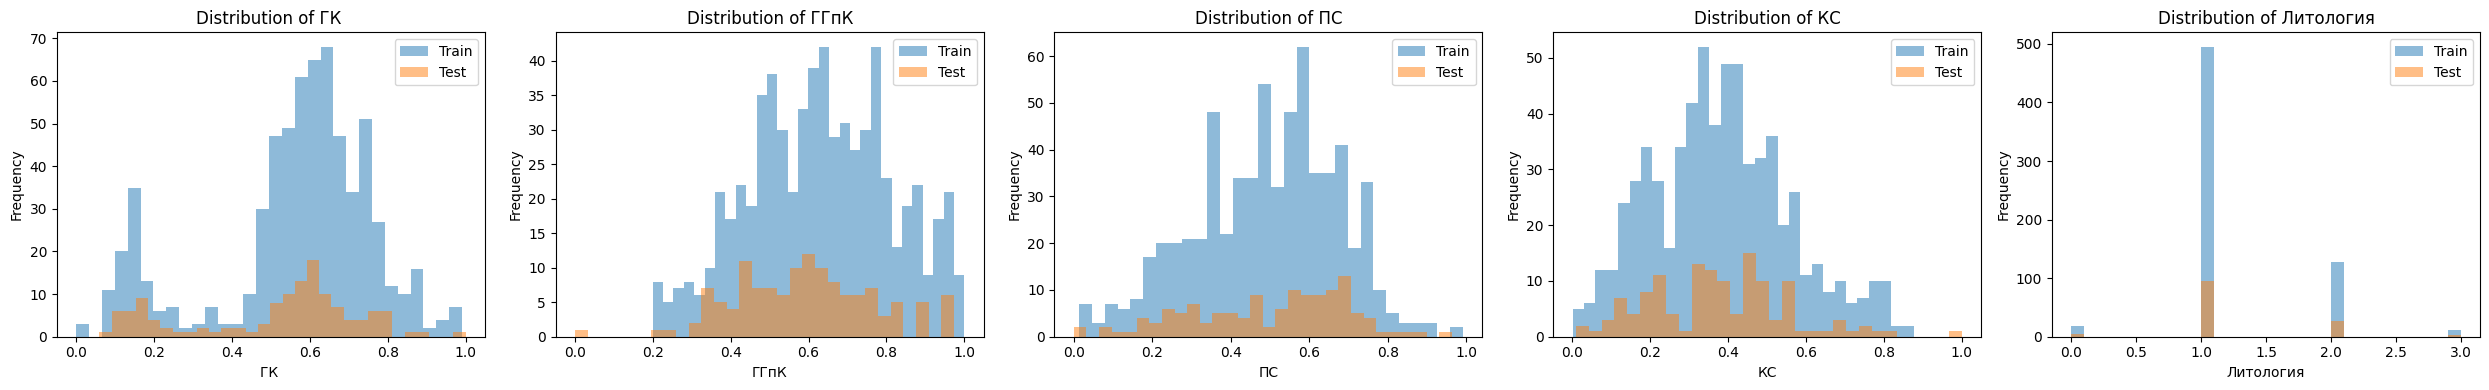

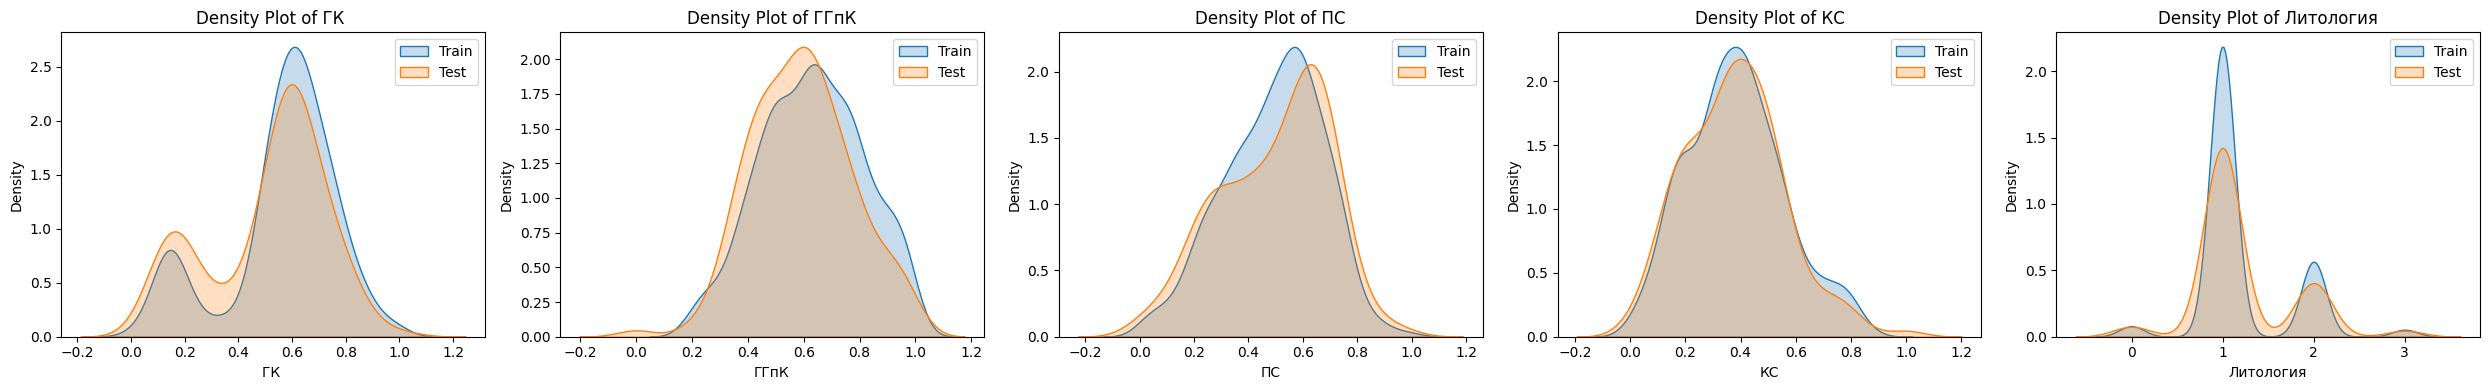

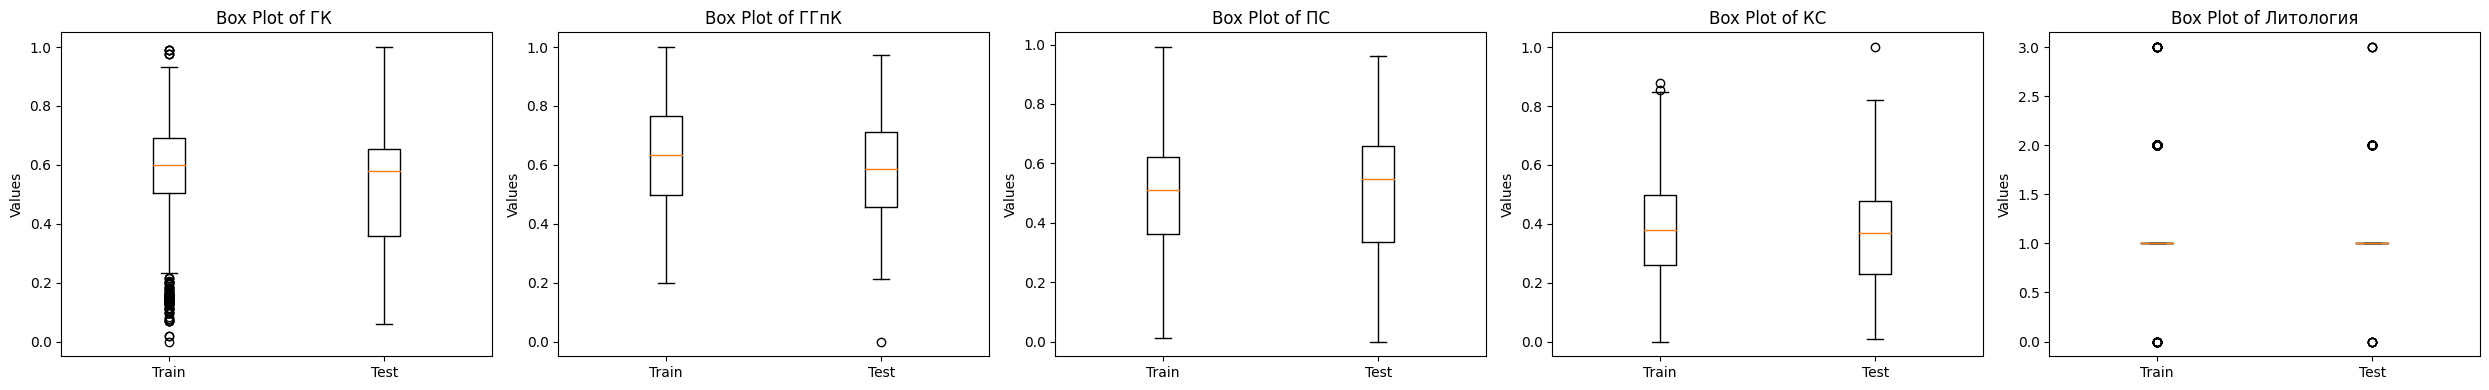

Feature: ГК , KS Statistic: 0.1426, P-value: 0.0216
Feature: ГГпК, KS Statistic: 0.1221, P-value: 0.0718
Feature: ПС, KS Statistic: 0.0984, P-value: 0.2270
Feature: КС, KS Statistic: 0.0534, P-value: 0.8970
Feature: Литология, KS Statistic: 0.0164, P-value: 1.0000
Training Data Summary Statistics:
               ГК         ГГпК          ПС          КС   Литология
count  653.000000  653.000000  653.000000  653.000000  653.000000
mean     0.563232    0.631078    0.493371    0.383010    1.205207
std      0.206837    0.183612    0.181557    0.177135    0.505343
min      0.000000    0.199198    0.013460    0.000847    0.000000
25%      0.503665    0.498828    0.363416    0.261035    1.000000
50%      0.600017    0.632161    0.511344    0.377683    1.000000
75%      0.691890    0.764919    0.620514    0.496494    1.000000
max      0.990748    1.000000    0.991643    0.877968    3.000000

Testing Data Summary Statistics:
               ГК         ГГпК          ПС          КС   Литология
count

In [111]:
# Assuming X_train and X_test are your training and testing datasets respectively
features = X_train.columns

# Visual Inspection with Histograms
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    axes[i].hist(X_train[feature], bins=30, alpha=0.5, label='Train')
    axes[i].hist(X_test[feature], bins=30, alpha=0.5, label='Test')
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Density Plots
# Density plots can also be used to compare the distributions more smoothly than histograms.
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    sns.kdeplot(X_train[feature], ax=axes[i], label='Train', fill=True)
    sns.kdeplot(X_test[feature], ax=axes[i], label='Test', fill=True)
    axes[i].set_title(f'Density Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
plt.tight_layout()
plt.show()

# Box Plots
fig, axes = plt.subplots(nrows=1, ncols=len(features), figsize=(5 * len(features), 4))
for i, feature in enumerate(features):
    axes[i].boxplot([X_train[feature], X_test[feature]], labels=['Train', 'Test'])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_ylabel('Values')
plt.tight_layout()
plt.show()

# KS Statistic:
# Definition: This is the maximum difference between the cumulative distribution functions (CDFs) of the two samples.
# Interpretation: A smaller KS statistic suggests that the distributions of the feature between the two datasets are more similar. A larger value indicates greater disparity.

# P-value:
# Definition: The p-value indicates the probability of observing the test results under the null hypothesis, which in this case is that the distributions of the two datasets are the same.
# Interpretation:
# High P-value (typically > 0.05): There is not enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically similar.
# Low P-value (typically < 0.05): There is enough evidence to reject the null hypothesis. This suggests that the distributions of the feature in the two datasets are statistically different.


# Practical Application
# Similar Distributions: If most features have low KS statistics and high p-values, you can proceed with the analysis, assuming that the training and testing datasets are drawn from similar distributions.
# Dissimilar Distributions: If several features show high KS statistics and low p-values, this might indicate potential issues such as sample bias or non-representative training data. This could affect the model's performance and its ability to generalize to new data.


# Statistical Tests
from scipy.stats import ks_2samp
for feature in features:
    stat, p_value = ks_2samp(X_train[feature], X_test[feature])
    print(f'Feature: {feature}, KS Statistic: {stat:.4f}, P-value: {p_value:.4f}')

# Summary Statistics
summary_train = X_train.describe()
summary_test = X_test.describe()
print("Training Data Summary Statistics:\n", summary_train)
print("\nTesting Data Summary Statistics:\n", summary_test)

Conclusion: All features show high p-values and relatively low KS statistics, suggesting that the distributions of these features in the training and testing datasets are statistically similar. This indicates good consistency and reliability for model training, as it suggests that the model's performance on the training data may generalize well to the testing data

In [112]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [113]:
!pip install xgboost

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

## Parameters grid

In [118]:
# Assuming X_train, y_train, X_val, y_val, X_test, y_test are defined
model_name = []

    #  GaussianProcess
# Define the kernel with hyperparameters as variables
kernel = RBF(length_scale=1.0)

# Define the parameter grid for Polynomial Regression

# List of models to evaluate
models_list = [
    # RandomForestRegressor(random_state=0xC0FFEE),
    # ExtraTreesRegressor(random_state=0xC0FFEE),
    # xgb.XGBRegressor(random_state=0xC0FFEE),
    # LinearRegression(),
    # Ridge(),
    # KNeighborsRegressor(),
    # DecisionTreeRegressor(),
    # GradientBoostingRegressor(random_state=0xC0FFEE),  # Added Gradient Boosting
    CatBoostRegressor(silent=True, random_state=0xC0FFEE),  # Added CatBoost
    # GaussianProcessRegressor(random_state=0xC0FFEE, kernel=kernel),
    # AdaBoostRegressor(random_state=0xC0FFEE),
    # MLPRegressor(random_state=0xC0FFEE)  # Added MLPRegressor,
    # Pipeline([('poly', PolynomialFeatures()),('linear', LinearRegression())]),
    # SVR()

]

# # Parameter grids for each model
# p_g1 = { #RandomForest
#     'n_estimators': np.arange(1, 100, 20),
#     'min_samples_split': np.arange(2, 51, 10),
#     'min_samples_leaf': np.arange(1, 51, 10),
#     'max_depth': np.arange(1,10, 1)
# }

# p_g2 = { #ExtraTrees
#     'n_estimators': np.arange(1, 100, 20),
#     'min_samples_split': np.arange(2, 51, 10),
#     'min_samples_leaf': np.arange(1, 51, 10),
#     'max_depth': np.arange(1, 10, 1),
#     'max_features': np.arange(2, 6, 1)
# }


# p_g3 = {
#     'n_estimators': np.arange(2, 200, 40),
#     "learning_rate": np.logspace(-3, 1, 10),
#     'gamma': np.arange(0, 10, 0.4),
#     'max_depth': np.arange(1, 10, 1)

# }

# p_g4 = {  # Linear Regression has no hyperparameters to tune
# }

# p_g5 = {  # Ridge Regression parameters
#     'alpha': np.logspace(-3, 3, 7),  # Regularization strength
# }

# p_g6 = {  # KNeighbors Regressor parameters
#     'n_neighbors': np.arange(1, 21, 1),   # Number of neighbors
#     'weights': ['uniform', 'distance'], # Weight function used in prediction
# }

# p_g7 = {  # Decision Tree Regressor parameters
#     'max_depth': [None] + list(np.arange(1, 11)),   # Maximum depth of the tree
#     'min_samples_split': np.arange(2, 21),           # Minimum number of samples required to split an internal node
# }

# p_g8 = {  # Gradient Boosting parameters
#     'n_estimators': np.arange(1, 100, 10),          # Number of boosting stages to be run
#     'learning_rate': np.logspace(-4, 0, 10),                # Step size shrinkage used in update to prevents overfitting
#     'max_depth': np.arange(1, 10, 1),
#     'min_samples_split': np.arange(2, 30, 8),
#     # 'min_samples_leaf': np.arange(1, 30, 8),
#           # "max_features":["log2","sqrt"],

# }

# p_g9 = {  # CatBoost parameters (basic)
#     'iterations': np.arange(50, 500, 50),              # Number of boosting iterations
#     'learning_rate': np.logspace(-4, 0, 10),                     # Learning rate for boosting steps
#     'depth': np.arange(2, 20, 1),                                  # Depth of the tree
# }

p_g9 = {  # CatBoost parameters (basic)
    'iterations': np.arange(200, 1200, 400),              # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1, 0.2,  0.5],                     # Learning rate for boosting steps
    'depth': np.arange(2, 14, 2),                                  # Depth of the tree
}

# p_g10 = {  # GaussianProcess
#     'alpha': np.logspace(-2, 2, 4),
#     'kernel__length_scale': np.logspace(-3, 3, 10)
# }

# p_g11 = { # AdaBoost
#     'n_estimators': np.arange(1, 120, 20),  # Number of boosting stages to be run
#     'learning_rate': np.logspace(-4, 0, 5),  # Step size shrinkage used in update to prevents overfitting
# }

# p_g12 = { # MLPRegressor
#         'activation': ['relu', 'sigmoid', 'tanh'],
#         'learning_rate': ['adaptive', 'constant', 'invscaling'],
#         'solver': ['adam', 'sgd'],
#         'alpha': np.logspace(-5, 0, 6)
    # }

# p_g_poly = {
#     'poly__degree': [1, 2, 3, 4],  # Degrees of the polynomial
#     'linear__fit_intercept': [True, False]
# }

# p_g_svm = ({
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf'],
#     'gamma': ['scale', 'auto']
# })



# params_list = [p_g1, p_g2, p_g3, p_g4, p_g5, p_g6, p_g7, p_g8, p_g9, p_g10, p_g11, p_g12]
params_list = [
    # p_g1,
    # p_g3,
    # p_g4,
    # p_g7,
    # p_g8,
    p_g9,
    # p_g11,
    # p_g_poly,
    # p_g_svm
    ]

## Test-train with validation

In [ ]:
best_trained_model = []

# Save metrics for test-train
RMSE_validation, RMSE_test, RMSE_train = [], [], []
R2_validation, R2_test, R2_train = [], [], []
MAE_validation, MAE_test, MAE_train = [], [], []

for reg, grid in zip(models_list, params_list):

    start = time.perf_counter()

    print(f"Evaluating {type(reg).__name__}")
    print(grid)

    model_name.append(type(reg).__name__)
    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
    gs.fit(X_train, y_train)

    print(f'Training time for {type(reg).__name__}:', round((time.perf_counter() - start), 3))
    print(f'{type(reg).__name__}: Best Params: {gs.best_params_}')

    # Handle different types of models
    if isinstance(reg, GaussianProcessRegressor):
        best_length_scale = gs.best_params_['kernel__length_scale']
        kernel = RBF(length_scale=best_length_scale)
        best_reg = GaussianProcessRegressor(kernel=kernel, random_state=0xC0FFEE)
    elif isinstance(reg, Pipeline):
        # Reconfigure the pipeline with best parameters
        best_params = gs.best_params_
        steps = [(name, clf) for name, clf in reg.steps]
        for name, clf in steps:
            step_params = {param.split('__')[1]: value for param, value in best_params.items() if param.startswith(name)}
            clf.set_params(**step_params)
        best_reg = Pipeline(steps)
    else:
        # For other models, use the best parameters directly
        best_reg = reg.__class__(**gs.best_params_)

    # Evaluate using cross-validation on the training set
    cv_results = gs.cv_results_
    best_score = np.min(cv_results['mean_test_score'])

    print(f'Cross-validated MSE: {-best_score:.2f}')

    best_reg.fit(X_train, y_train)
    best_trained_model.append(best_reg)

    y_pred_val = best_reg.predict(X_val)
    y_pred_train = best_reg.predict(X_train)
    y_pred_test = best_reg.predict(X_test)

    # Validation metrics
    print('Validation MSE:', round(mean_squared_error(y_pred_val, y_val), 2))
    print('Validation R^2:', round(r2_score(y_val, y_pred_val), 2))
    print('Validation MAE:', round(mean_absolute_error(y_val, y_pred_val), 2))

    RMSE_validation.append(round(mean_squared_error(y_pred_val, y_val), 2))
    R2_validation.append(round(r2_score(y_val, y_pred_val), 2))
    MAE_validation.append(round(mean_absolute_error(y_val, y_pred_val), 2))

    # Training metrics
    print('Train MSE:', round(mean_squared_error(y_pred_train, y_train), 2))
    print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
    print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

    RMSE_train.append(round(mean_squared_error(y_pred_train, y_train), 2))
    R2_train.append(round(r2_score(y_train, y_pred_train), 2))
    MAE_train.append(round(mean_absolute_error(y_train, y_pred_train), 2))

    # Test metrics
    print('Test MSE:', round(mean_squared_error(y_pred_test, y_test), 2))
    print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))
    print('Train MAE:', round(mean_absolute_error(y_test, y_pred_test), 2))

    RMSE_test.append(round(mean_squared_error(y_pred_test, y_test), 2))
    R2_test.append(round(r2_score(y_test, y_pred_test), 2))
    MAE_test.append(round(mean_absolute_error(y_test, y_pred_test), 2))

    # print(best_trained_model)
    print(' ')

Evaluating RandomForestRegressor
{'n_estimators': array([ 1, 21, 41, 61, 81]), 'min_samples_split': array([ 2, 12, 22, 32, 42]), 'min_samples_leaf': array([ 1, 11, 21, 31, 41]), 'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}
Training time for RandomForestRegressor: 393.717
RandomForestRegressor: Best Params: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 81}
Cross-validated MSE: 0.06
Validation MSE: 0.02
Validation R^2: 0.71
Validation MAE: 0.12
Train MSE: 0.01
Train R^2: 0.93
Train MAE: 0.06
Test MSE: 0.03
Test R^2: 0.71
Train MAE: 0.13
 
Evaluating XGBRegressor
{'n_estimators': array([  2,  42,  82, 122, 162]), 'learning_rate': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01]), 'gamma': array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8,
       5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. , 8.4, 8.8, 9.2, 9

In [ ]:
evaluation = pd.DataFrame({
    'Model': model_name,
    'Validation RMSE': RMSE_validation,
    'Validation R^2': R2_validation,
    'Validation MAE': MAE_validation,
    'Train RMSE': RMSE_train,
    'Train R^2': R2_train,
    'Train MAE': MAE_train,
    'Test RMSE': RMSE_test,
    'Test R^2': R2_test,
    'Test MAE': MAE_test
})

print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

## Test-train without validation

In [116]:
# Предположим, что gs.cv_results_ содержит результаты для CatBoost
def plot_metrics_for_param(cv_results, param_name, metric='mean_test_score'):
    param_values = cv_results['param_' + param_name]
    mean_scores = cv_results[metric]

    # Подготовка данных для графика
    unique_values = np.unique(param_values)
    mean_scores_per_value = [mean_scores[param_values == value].mean() for value in unique_values]

    plt.figure(figsize=(10, 5))
    plt.plot(unique_values, mean_scores_per_value, marker='o')
    plt.title(f'Change of {metric} with {param_name}')
    plt.xlabel(param_name)
    plt.ylabel(metric)
    plt.grid(True)
    plt.show()


Evaluating CatBoostRegressor
{'iterations': array([ 200,  600, 1000]), 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5], 'depth': array([ 2,  4,  6,  8, 10, 12])}


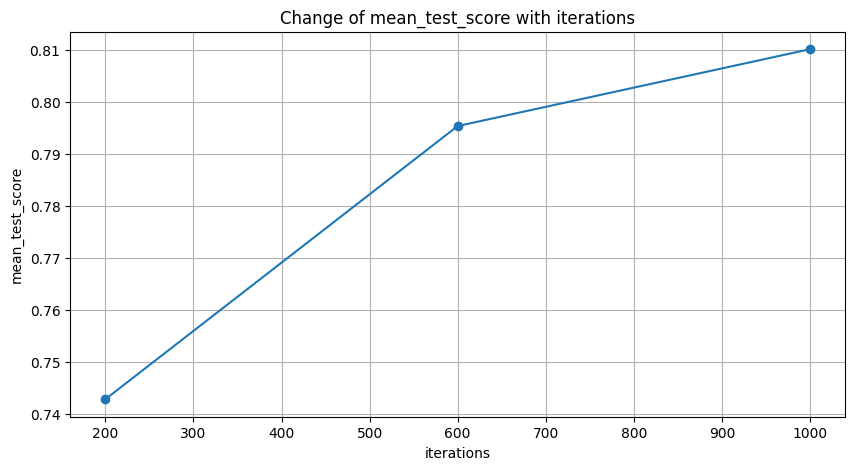

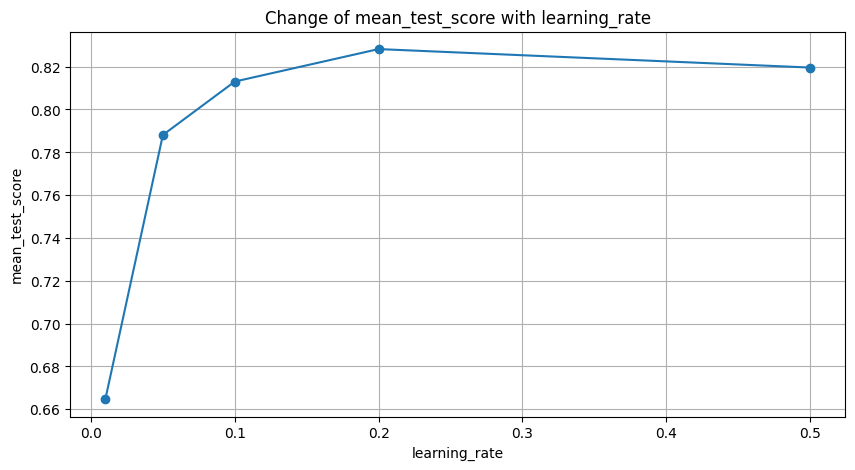

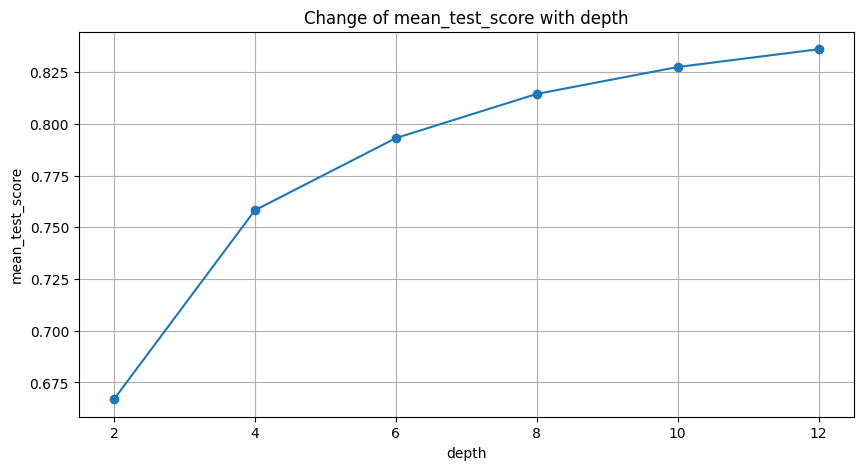

Training time for CatBoostRegressor: 3202.937
CatBoostRegressor: Best Params: {'depth': 12, 'iterations': 600, 'learning_rate': 0.1}
0:	learn: 0.3207242	total: 32.8ms	remaining: 19.7s
1:	learn: 0.3049877	total: 79ms	remaining: 23.6s
2:	learn: 0.2904275	total: 131ms	remaining: 26s
3:	learn: 0.2770763	total: 167ms	remaining: 24.8s
4:	learn: 0.2674934	total: 168ms	remaining: 20s
5:	learn: 0.2565363	total: 217ms	remaining: 21.5s
6:	learn: 0.2467517	total: 262ms	remaining: 22.2s
7:	learn: 0.2377328	total: 307ms	remaining: 22.7s
8:	learn: 0.2301408	total: 352ms	remaining: 23.1s
9:	learn: 0.2224561	total: 399ms	remaining: 23.6s
10:	learn: 0.2160065	total: 450ms	remaining: 24.1s
11:	learn: 0.2122407	total: 452ms	remaining: 22.1s
12:	learn: 0.2054213	total: 504ms	remaining: 22.7s
13:	learn: 0.2013983	total: 507ms	remaining: 21.2s
14:	learn: 0.1960973	total: 519ms	remaining: 20.2s
15:	learn: 0.1910420	total: 564ms	remaining: 20.6s
16:	learn: 0.1872669	total: 576ms	remaining: 19.7s
17:	learn: 0.1

In [119]:
best_trained_model = []

# Save metrics for test-train
RMSE_validation, RMSE_test, RMSE_train = [], [], []
R2_validation, R2_test, R2_train = [], [], []
MAE_validation, MAE_test, MAE_train = [], [], []

for reg, grid in zip(models_list, params_list):
    start = time.perf_counter()

    print(f"Evaluating {type(reg).__name__}")
    print(grid)

    gs = GridSearchCV(reg, param_grid=grid, n_jobs=-1, cv=5, scoring='r2')
    gs.fit(X_train, y_train)

        # Пример вызова функции для визуализации
    plot_metrics_for_param(gs.cv_results_, 'iterations')
    plot_metrics_for_param(gs.cv_results_, 'learning_rate')
    plot_metrics_for_param(gs.cv_results_, 'depth')

    print(f'Training time for {type(reg).__name__}:', round((time.perf_counter() - start), 3))
    print(f'{type(reg).__name__}: Best Params: {gs.best_params_}')

    # Handle different types of models
    if isinstance(reg, GaussianProcessRegressor):
        best_length_scale = gs.best_params_['kernel__length_scale']
        kernel = RBF(length_scale=best_length_scale)
        best_reg = GaussianProcessRegressor(kernel=kernel, random_state=0xC0FFEE)
    elif isinstance(reg, Pipeline):
        best_params = gs.best_params_
        steps = [(name, clf) for name, clf in reg.steps]
        for name, clf in steps:
            step_params = {param.split('__')[1]: value for param, value in best_params.items() if param.startswith(name)}
            clf.set_params(**step_params)
        best_reg = Pipeline(steps)
    else:
        best_reg = reg.__class__(**gs.best_params_)

    best_reg.fit(X_train, y_train)
    best_trained_model.append(best_reg)

    # Evaluate using cross-validation on the training set
    cv_results = gs.cv_results_
    best_score = np.min(cv_results['mean_test_score'])
    print(f'Cross-validated MSE: {-best_score:.2f}')

    y_pred_train = best_reg.predict(X_train)
    y_pred_test = best_reg.predict(X_test)

    # Training metrics
    print('Train MSE:', round(mean_squared_error(y_pred_train, y_train), 2))
    print('Train R^2:', round(r2_score(y_train, y_pred_train), 2))
    print('Train MAE:', round(mean_absolute_error(y_train, y_pred_train), 2))

    RMSE_train.append(round(mean_squared_error(y_pred_train, y_train), 2))
    R2_train.append(round(r2_score(y_train, y_pred_train), 2))
    MAE_train.append(round(mean_absolute_error(y_train, y_pred_train), 2))

    # Test metrics
    print('Test MSE:', round(mean_squared_error(y_pred_test, y_test), 2))
    print('Test R^2:', round(r2_score(y_test, y_pred_test), 2))
    print('Test MAE:', round(mean_absolute_error(y_test, y_pred_test), 2))

    RMSE_test.append(round(mean_squared_error(y_pred_test, y_test), 2))
    R2_test.append(round(r2_score(y_test, y_pred_test), 2))
    MAE_test.append(round(mean_absolute_error(y_test, y_pred_test), 2))

    print(' ')

In [ ]:
evaluation = pd.DataFrame({
    'Model': model_name,
    'Train RMSE': RMSE_train,
    'Train MAE': MAE_train,
    'Train R^2': R2_train,
    'Test RMSE': RMSE_test,
    'Test MAE': MAE_test,
    'Test R^2': R2_test
})

print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,Validation RMSE,Validation R^2,Validation MAE,Train RMSE,Train R^2,Train MAE,Test RMSE,Test R^2,Test MAE
0,Pipeline,0.03,0.59,0.14,0.03,0.66,0.14,0.04,0.67,0.14
1,SVR,0.03,0.63,0.13,0.02,0.74,0.12,0.03,0.70,0.14
2,Pipeline,0.03,0.59,0.14,0.03,0.66,0.14,0.04,0.67,0.14
3,SVR,0.03,0.63,0.13,0.02,0.74,0.12,0.03,0.70,0.14


### Feature importance

0:	learn: 0.2893299	total: 7.99ms	remaining: 1.35s
1:	learn: 0.2717081	total: 64.3ms	remaining: 5.4s
2:	learn: 0.2566922	total: 115ms	remaining: 6.4s
3:	learn: 0.2442978	total: 125ms	remaining: 5.18s
4:	learn: 0.2340430	total: 130ms	remaining: 4.29s
5:	learn: 0.2239882	total: 178ms	remaining: 4.87s
6:	learn: 0.2129867	total: 219ms	remaining: 5.1s
7:	learn: 0.2034171	total: 264ms	remaining: 5.34s
8:	learn: 0.1963275	total: 309ms	remaining: 5.53s
9:	learn: 0.1885579	total: 352ms	remaining: 5.64s
10:	learn: 0.1813928	total: 397ms	remaining: 5.75s
11:	learn: 0.1766414	total: 445ms	remaining: 5.86s
12:	learn: 0.1713452	total: 489ms	remaining: 5.91s
13:	learn: 0.1663098	total: 545ms	remaining: 6.07s
14:	learn: 0.1628011	total: 565ms	remaining: 5.84s
15:	learn: 0.1583076	total: 609ms	remaining: 5.86s
16:	learn: 0.1552120	total: 617ms	remaining: 5.56s
17:	learn: 0.1520188	total: 671ms	remaining: 5.67s
18:	learn: 0.1501043	total: 675ms	remaining: 5.36s
19:	learn: 0.1472317	total: 726ms	remainin

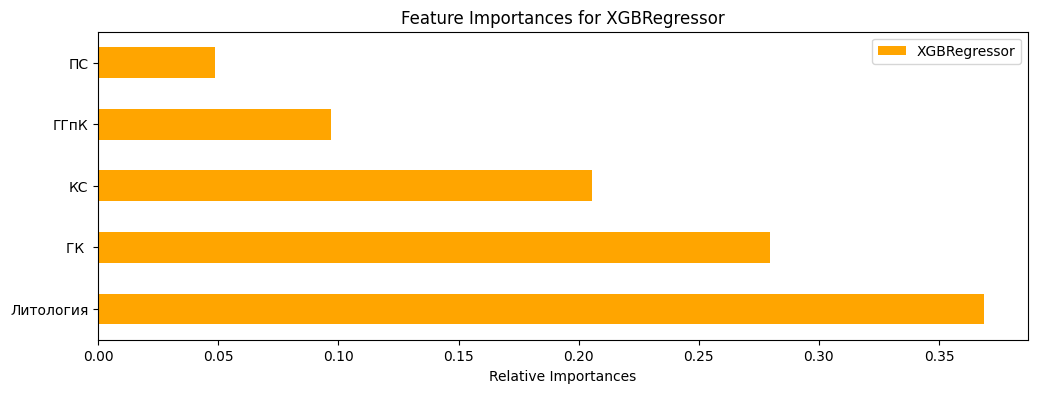

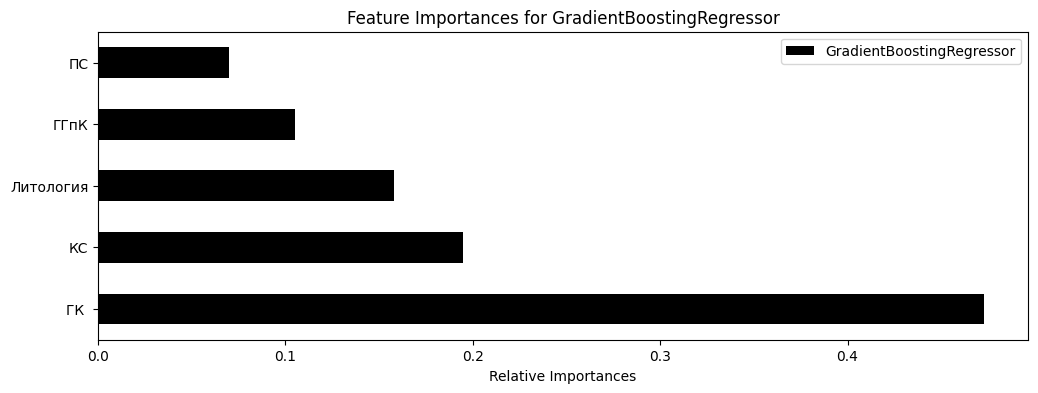

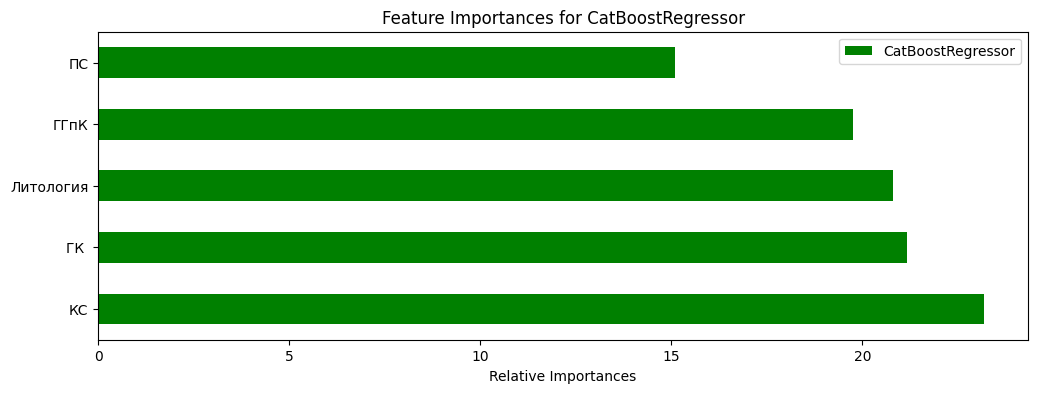

In [ ]:
# Assuming X_train and y_train are already defined and the models are imported correctly
best_trained_model = [
    XGBRegressor(
        gamma=0.0,
        learning_rate=0.05994842503189409,
        max_depth=4,
        n_estimators=162
    ),
    GradientBoostingRegressor(
        learning_rate=0.12915496650148828,
        min_samples_split=26,
        n_estimators=51
    ),
    CatBoostRegressor(
        depth=11,
        iterations=170,
        learning_rate=0.12915496650148828
    )
]

# Fit models
for model in best_trained_model:
    model.fit(X_train, y_train)

# Plotting function
colors = ['orange', 'black', 'green']
for i, model in enumerate(best_trained_model):
    plt.figure(figsize=(12, 4))
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    feat_importances.nlargest(X_train.shape[1]).plot(
        kind='barh',
        color=colors[i],
        label=type(model).__name__
    )
    plt.xlabel('Relative Importances')
    plt.title(f'Feature Importances for {type(model).__name__}')
    plt.legend()
    plt.show()

## Best model

In [ ]:
path_to_ser = Path('/content/Full_output_new.xlsx')
data_initial = pd.read_excel(path_to_ser, sheet_name='to use', skiprows=0)
result_new = data_initial.copy()

In [ ]:
result_new

,Глубина,Литология,Sample ID,НТПК,ГК,ГГпК,ПС,КС
0,12.800,Гнейсы,NaN,NaN,17.2700,37.18000,3.60660,474.6100
1,12.900,Гнейсы,NaN,NaN,16.5500,37.31333,3.62580,416.4000
2,13.000,Гнейсы,NaN,NaN,17.7600,36.76500,3.73740,452.7400
3,13.300,Гнейсы,NaN,NaN,20.7700,37.88667,3.73620,511.1200
4,13.400,Гнейсы,NaN,NaN,21.5800,37.17333,3.84410,443.1000
...,...,...,...,...,...,...,...,...
831,164.029,Гнейсы,5.0,3.095736,20.6089,33.46193,3.78403,3108.1439
832,164.303,Гнейсы,4.0,2.960388,21.7323,31.65353,3.36481,3557.2573
833,164.586,Гнейсы,3.0,2.826592,22.8926,29.78573,2.93182,4021.1226
834,164.721,Гнейсы,2.0,2.795487,23.4461,28.89473,2.72527,4242.4011


In [ ]:
result_new_full = pd.DataFrame()
new_dataframe = result_new_full

new_depths = np.arange(12.8, 164.101, 0.001)

interpolation(result_new['Глубина'], result_new['ГК '], new_dataframe, new_depths) # ГК
interpolation(result_new['Глубина'], result_new['ГГпК'], new_dataframe, new_depths) # ГГпК
interpolation(result_new['Глубина'], result_new['ПС'], new_dataframe, new_depths) # ПС
interpolation(result_new['Глубина'], result_new['КС'], new_dataframe, new_depths) # КС

# interpolated_df_full.drop(['Depth_TC'], axis=1, inplace=True)
# interpolated_df_full.rename(columns={'TC filt tri': 'Target'}, inplace=True)
result_new_full

,Глубина,ГК,ГГпК,ПС,КС
0,12.800,17.2700,37.180000,3.606600,474.6100
1,12.801,17.2628,37.181333,3.606792,474.0279
2,12.802,17.2556,37.182667,3.606984,473.4458
3,12.803,17.2484,37.184000,3.607176,472.8637
4,12.804,17.2412,37.185333,3.607368,472.2816
...,...,...,...,...,...
151296,164.096,20.8836,33.019730,3.681520,3217.9636
151297,164.097,20.8877,33.013130,3.679990,3219.6027
151298,164.098,20.8918,33.006530,3.678460,3221.2418
151299,164.099,20.8959,32.999930,3.676930,3222.8809


In [ ]:
path_to_ser = Path(output_file)
data_initial_lithology = pd.read_excel(path_to_ser, sheet_name='Lithology', skiprows=0)
data_lithology = data_initial_lithology.copy()

In [ ]:
lithology = data_lithology[['Кровля', 'Подошва','Литология']].dropna()

In [ ]:
interpolated_result_new_full_lith = pd.merge(
    lit_func(lithology, result_new_full),
    result_new_full ,
    on='Глубина',
    how='inner'
)

In [ ]:
interpolated_result_new_full_lith.columns

Index(['Глубина', 'Литология', 'ГК ', 'ГГпК', 'ПС', 'КС'], dtype='object')

In [ ]:
# X_full = interpolated_result_new_full_lith[['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология']]

X_full = result_new [['ГК ', 'ГГпК', 'ПС', 'КС', 'Литология']]
# y_full = interpolated_df_lith['Target']

In [ ]:
X_full

,ГК,ГГпК,ПС,КС,Литология
0,17.2700,37.18000,3.60660,474.6100,Гнейсы
1,16.5500,37.31333,3.62580,416.4000,Гнейсы
2,17.7600,36.76500,3.73740,452.7400,Гнейсы
3,20.7700,37.88667,3.73620,511.1200,Гнейсы
4,21.5800,37.17333,3.84410,443.1000,Гнейсы
...,...,...,...,...,...
831,20.6089,33.46193,3.78403,3108.1439,Гнейсы
832,21.7323,31.65353,3.36481,3557.2573,Гнейсы
833,22.8926,29.78573,2.93182,4021.1226,Гнейсы
834,23.4461,28.89473,2.72527,4242.4011,Гнейсы


In [ ]:
X_train

,ГК,ГГпК,ПС,КС,Литология
375,0.650846,0.647357,0.602566,0.712811,1
415,0.151526,0.432526,0.334419,0.490233,2
108,0.500483,0.638728,0.723588,0.178308,1
326,0.703583,0.764059,0.459880,0.695122,1
194,0.120448,0.508066,0.485460,0.109671,0
...,...,...,...,...,...
145,0.719504,0.508801,0.571053,0.282566,1
346,0.627985,0.780483,0.785634,0.460236,1
373,0.582952,0.689305,0.341827,0.855852,1
125,0.648905,0.547326,0.196787,0.475013,1


In [ ]:
categorical_clmn = X_full.select_dtypes(include='object').columns
# Apply Label Encoding to each categorical column
for col in categorical_clmn:
    X_full[col] = LabelEncoder().fit_transform(X_full[col])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['ГК ', 'ГГпК', 'ПС', 'КС']
X_full[numerical_columns] = scaler.fit_transform(X_full[numerical_columns])
print(X_full)

          ГК       ГГпК        ПС        КС  Литология
0    0.381172  0.617146  0.239080  0.073244          1
1    0.358419  0.625887  0.243096  0.059917          1
2    0.396657  0.589940  0.266440  0.068237          1
3    0.491779  0.663474  0.266189  0.081602          1
4    0.517377  0.616709  0.288759  0.066030          1
..        ...       ...       ...       ...        ...
831  0.486688  0.373400  0.276194  0.676158          1
832  0.522190  0.254847  0.188503  0.778977          1
833  0.558858  0.132399  0.097932  0.885173          1
834  0.576350  0.073988  0.054727  0.935832          1
835  0.598506  0.000000  0.000000  1.000000          1

[836 rows x 5 columns]


In [ ]:
X

,ГК,ГГпК,ПС,КС,Литология
0,0.598506,0.000000,0.000000,1.000000,1
1,0.576350,0.118475,0.054727,0.931806,1
2,0.558858,0.212008,0.097932,0.877968,1
3,0.522190,0.408080,0.188503,0.765108,1
4,0.486688,0.597917,0.276194,0.655838,1
...,...,...,...,...,...
648,0.543496,0.839430,0.601132,0.193747,1
649,0.509413,0.833356,0.564803,0.194356,1
650,0.468023,0.857457,0.534785,0.195378,1
651,0.509802,0.860334,0.528868,0.196005,1


In [ ]:
# Define the parameter grid based on previous setup
# param_grid = {
#     'learning_rate': [0.0316],
#     'max_depth': [6],
#     'n_estimators': [200]


param_grid = {
    'learning_rate': [0.1],
    'min_samples_split': [26],
    'n_estimators': [82]
}

# best_model = GradientBoostingRegressor(random_state=0xC0FFEE)
best_model = GradientBoostingRegressor(random_state=0xC0FFEE)

# Setup GridSearchCV
gs = GridSearchCV(best_model, param_grid=param_grid, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')
gs.fit(X_val, y_val)  # Fit on validation set, or use another appropriate subset

# Extract the best parameters and fit on the entire dataset
best_params = gs.best_params_
best_model.fit(X, y)  # Fit on the entire dataset
print(best_params)


# Predict the values of y
y_pred = best_model.predict(X)
y_pred_full = best_model.predict(X_full)


# y_pred_val = best_extra_trees.predict(X_val)
# y_pred_train = best_extra_trees.predict(X_train)
# y_pred_test = best_extra_trees.predict(X_test)

# print(len(y_pred_val), len(y_pred_train), len(y_pred_test))

{'learning_rate': 0.1, 'min_samples_split': 26, 'n_estimators': 82}


In [ ]:
X_full

,ГК,ГГпК,ПС,КС,Литология
0,0.381172,0.617146,0.239080,0.073244,1
1,0.358419,0.625887,0.243096,0.059917,1
2,0.396657,0.589940,0.266440,0.068237,1
3,0.491779,0.663474,0.266189,0.081602,1
4,0.517377,0.616709,0.288759,0.066030,1
...,...,...,...,...,...
831,0.486688,0.373400,0.276194,0.676158,1
832,0.522190,0.254847,0.188503,0.778977,1
833,0.558858,0.132399,0.097932,0.885173,1
834,0.576350,0.073988,0.054727,0.935832,1
